## <p style="background-color:#033E3E; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

**So far, we have filled the missing values in the data set. In this study, we will consider outliers. Before the machine learning, we will evaluate outliers to build a more successful model.**

## <p style="background-color:#033E3E; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### <p style="background-color:#033E3E; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:left; border-radius:10px 10px;">Functions</p>

In [443]:
# summary of field such as missing values, unique values, number of unique
def summary(field) :
    print("Column name              : ", field)
    print("--------------------------------")
    print("Total missing value      : ", df[field].isnull().sum())
    print("Percentage of missing    : ", round(df[field].isnull().sum()*100 / df.shape[0], 2)  )
    print("Number of unique values  : ", df[field].nunique() )
    print()
    print("Unique values  : ", df[field].unique(), sep="\n")
    print()
    print("Number of values", df[field].value_counts(dropna=False), sep="\n")

In [444]:
# Fills the missing values with "mode" method according to 1-2-3-stage grouping
def fill_most_freq(df, group_col, col_name):
    if len(group_col) == 1 :
        for group_member in df[group_col[0]].unique():
            cond = df[group_col[0]] == group_member
            mode = list(df[cond][col_name].mode()[0])
            if mode != []:
                df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
            else:
                df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    
    elif len(group_col) == 2 :
        for group_member1 in df[group_col[0]].unique(): 
                for group_member2 in df[group_col[1]].unique(): 
                    cond1 = df[group_col[0]] == group_member1
                    cond2 = ( df[group_col[0]] == group_member1 ) & ( df[group_col[1]] == group_member2 )
                    mode1 = list(df[cond1][col_name].mode())
                    mode2 = list(df[cond2][col_name].mode()) 
                    if mode2 != []:
                        df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                    elif mode1 != []:
                        df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                    else:
                        df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                        
    elif len(group_col) == 3 :
        for group_member1 in df[group_col[0]].unique(): 
                for group_member2 in df[group_col[1]].unique(): 
                    for group_member3 in df[group_col[2]].unique(): 
                        cond1 = df[group_col[0]] == group_member1
                        cond2 = ( df[group_col[0]] == group_member1 ) & ( df[group_col[1]] == group_member2 )
                        cond3 = ( df[group_col[0]] == group_member1 ) & ( df[group_col[1]] == group_member2 ) & ( df[group_col[2]] == group_member3 )
                        mode1 = list(df[cond1][col_name].mode())
                        mode2 = list(df[cond2][col_name].mode()) 
                        mode3 = list(df[cond3][col_name].mode()) 
                        if mode3 != []:
                            df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[cond3][col_name].mode()[0])
                        elif mode2 != []:
                            df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[cond2][col_name].mode()[0])
                        elif mode1 != []:
                            df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[cond1][col_name].mode()[0])
                        else:
                            df.loc[cond3, col_name] = df.loc[cond3, col_name].fillna(df[col_name].mode()[0])
                            
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))                            

In [445]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [446]:
def fill_median(df, group_col1, group_col2, group_col3, col_name):
    
    df[col_name].fillna(df.groupby([group_col1, group_col2, group_col3])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))  

In [447]:
def fill_mean(df, group_col1, group_col2, group_col3, col_name):
    
    df[col_name].fillna(df.groupby([group_col1, group_col2, group_col3])[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))   

## <p style="background-color:#033E3E; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Overview</p>

In [448]:
df = pd.read_csv("filled_missing_scout.csv")
df.head().T

0          1          2          3          4
make_model          Audi A1    Audi A1    Audi A1    Audi A1    Audi A1
body_type            Sedans     Sedans     Sedans     Sedans     Sedans
price                 15770      14500      14640      14500      16790
km                 56013.00   80000.00   83450.00   73000.00   16200.00
type                   Used       Used       Used       Used       Used
inspection_new          Yes         No         No         No        Yes
body_color            Black        Red      Black      Brown      Black
paint_type         Metallic   Metallic   Metallic   Metallic   Metallic
nr_of_doors            5.00       3.00       4.00       3.00       5.00
nr_of_seats            5.00       4.00       4.00       4.00       5.00
gearing_type      Automatic  Automatic  Automatic  Automatic  Automatic
displacement        1422.00    1798.00    1598.00    1422.00    1422.00
weight              1220.00    1255.00    1135.00    1195.00    1135.00
drive_chain           front      front      front      front      front
fuel                 Diesel    Benzine     Diesel     Diesel     Diesel
co2_emission          99.00     129.00      99.00      99.00     109.00
emission_class       Euro 6     Euro 6     Euro 6     Euro 6     Euro 6
gears                  7.00       7.00       7.00       6.00       7.00
country_version     Germany    Germany    Germany    Germany    Germany
previous_owners        2.00       1.00       1.00       1.00       1.00
hp_kw                 66.00     141.00      85.00      66.00      66.00
upholstery_type       Cloth      Cloth      Cloth      Cloth      Cloth
upholstery_color      Black       Grey      Black      Black      Black
cons_comb              3.80       5.60       3.80       3.80       4.10
age                    3.00       2.00       3.00       3.00       3.00
num_of_extras             3          4          2          3          4

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make_model        15919 non-null  object 
 1   body_type         15919 non-null  object 
 2   price             15919 non-null  int64  
 3   km                15919 non-null  float64
 4   type              15919 non-null  object 
 5   inspection_new    15919 non-null  object 
 6   body_color        15919 non-null  object 
 7   paint_type        15919 non-null  object 
 8   nr_of_doors       15919 non-null  float64
 9   nr_of_seats       15919 non-null  float64
 10  gearing_type      15919 non-null  object 
 11  displacement      15919 non-null  float64
 12  weight            15919 non-null  float64
 13  drive_chain       15919 non-null  object 
 14  fuel              15919 non-null  object 
 15  co2_emission      15919 non-null  float64
 16  emission_class    15919 non-null  object

In [450]:
df.describe()

price        km  nr_of_doors  nr_of_seats  displacement   weight  \
count 15919.00  15919.00     15919.00     15919.00      15919.00 15919.00   
mean  18019.90  32078.10         4.66         4.95       1424.59  1337.43   
std    7386.17  36979.40         0.64         0.48        329.86   200.47   
min      13.00      0.00         1.00         2.00          1.00     1.00   
25%   12850.00   1925.00         4.00         5.00       1229.00  1165.00   
50%   16900.00  20407.00         5.00         5.00       1461.00  1295.00   
75%   21900.00  46898.50         5.00         5.00       1598.00  1472.00   
max   74600.00 317000.00         7.00         7.00      16000.00  2471.00   

       co2_emission    gears  previous_owners    hp_kw  cons_comb      age  \
count      15919.00 15919.00         15919.00 15919.00   15919.00 15919.00   
mean         117.71     5.94             1.04    88.37       4.85     1.39   
std           19.68     0.79             0.34    26.84       0.92     1.12   
min            0.00     1.00             0.00     1.00       1.20     0.00   
25%          104.00     5.00             1.00    66.00       4.10     0.00   
50%          117.00     6.00             1.00    85.00       4.80     1.00   
75%          129.00     6.00             1.00   101.00       5.40     2.00   
max          990.00    50.00             4.00   294.00      36.00     3.00   

       num_of_extras  
count       15919.00  
mean            2.24  
std             1.50  
min             1.00  
25%             1.00  
50%             2.00  
75%             3.00  
max            10.00

In [451]:
df.describe(include="object").T

count unique       top   freq
make_model        15919      9   Audi A3   3097
body_type         15919      8    Sedans   8005
type              15919      5      Used  11098
inspection_new    15919      2        No  11987
body_color        15919     14     Black   3900
paint_type        15919      3  Metallic  15250
gearing_type      15919      3    Manual   8153
drive_chain       15919      3     front  15711
fuel              15919      5   Benzine   8551
emission_class    15919      3    Euro 6  15798
country_version   15919     23   Germany   8835
upholstery_type   15919      5     Cloth  12157
upholstery_color  15919      9     Black  13035

In [452]:
df.corr()

price    km  nr_of_doors  nr_of_seats  displacement  weight  \
price             1.00 -0.40         0.16         0.25          0.23    0.47   
km               -0.40  1.00         0.01        -0.01          0.26    0.15   
nr_of_doors       0.16  0.01         1.00         0.10          0.07    0.17   
nr_of_seats       0.25 -0.01         0.10         1.00          0.15    0.33   
displacement      0.23  0.26         0.07         0.15          1.00    0.47   
weight            0.47  0.15         0.17         0.33          0.47    1.00   
co2_emission      0.32 -0.21        -0.04         0.26          0.22    0.27   
gears             0.47 -0.03         0.10         0.09          0.26    0.29   
previous_owners  -0.15  0.16        -0.13        -0.00          0.02    0.00   
hp_kw             0.69  0.00         0.12         0.29          0.50    0.63   
cons_comb         0.28 -0.33        -0.08         0.22         -0.01    0.09   
age              -0.47  0.76        -0.09        -0.09          0.19    0.07   
num_of_extras     0.25  0.02        -0.04         0.03          0.19    0.15   

                 co2_emission  gears  previous_owners  hp_kw  cons_comb   age  \
price                    0.32   0.47            -0.15   0.69       0.28 -0.47   
km                      -0.21  -0.03             0.16   0.00      -0.33  0.76   
nr_of_doors             -0.04   0.10            -0.13   0.12      -0.08 -0.09   
nr_of_seats              0.26   0.09            -0.00   0.29       0.22 -0.09   
displacement             0.22   0.26             0.02   0.50      -0.01  0.19   
weight                   0.27   0.29             0.00   0.63       0.09  0.07   
co2_emission             1.00   0.09            -0.03   0.47       0.79 -0.26   
gears                    0.09   1.00            -0.03   0.40       0.01 -0.06   
previous_owners         -0.03  -0.03             1.00  -0.02      -0.03  0.32   
hp_kw                    0.47   0.40            -0.02   1.00       0.37 -0.09   
cons_comb                0.79   0.01            -0.03   0.37       1.00 -0.36   
age                     -0.26  -0.06             0.32  -0.09      -0.36  1.00   
num_of_extras            0.20   0.20             0.01   0.35       0.16 -0.03   

                 num_of_extras  
price                     0.25  
km                        0.02  
nr_of_doors              -0.04  
nr_of_seats               0.03  
displacement              0.19  
weight                    0.15  
co2_emission              0.20  
gears                     0.20  
previous_owners           0.01  
hp_kw                     0.35  
cons_comb                 0.16  
age                      -0.03  
num_of_extras             1.00

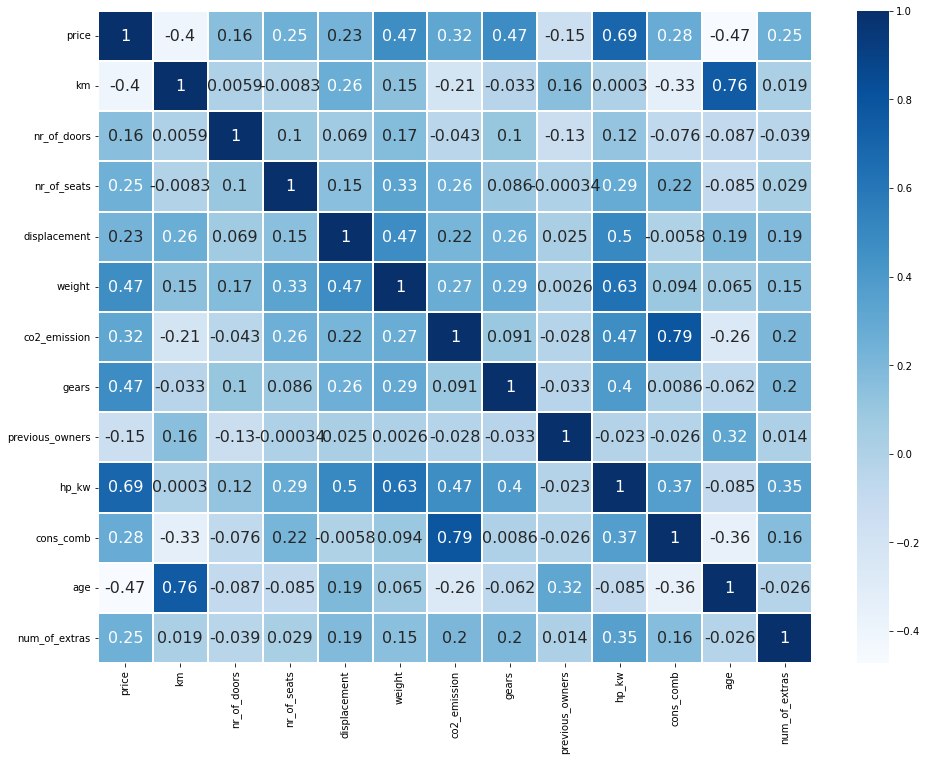

In [453]:
plt.figure(figsize=(16, 12))

sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

## 1. Categorical Data

### 1.1 make_model

In [454]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

**I will drop it because there is only 1 value. There isn't enough observations for ML**

In [455]:
df[df.make_model == "Audi A2"].index

Int64Index([2614], dtype='int64')

In [456]:
df.drop(index=df[df.make_model == "Audi A2"].index, inplace=True)

### 1.2 body_color

In [457]:
df.body_color.value_counts()

Black     3900
Grey      3614
White     3520
Silver    1707
Blue      1522
Red        995
Brown      298
Green      166
Beige      116
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

**Too many unique values can create negative learning for ML. We can collect the colors below a certain number into a group as "Others". Or we can drop this column. In this project, we will not drop the data for now.**

In [458]:
colors = ['Brown', 'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange', 'Gold']
df.body_color.replace(colors, "Others", inplace=True)

In [459]:
df.body_color.value_counts()

Black     3900
Grey      3614
White     3520
Silver    1707
Blue      1522
Red        995
Others     660
Name: body_color, dtype: int64

### 1.3 drive_chain

In [460]:
df.drive_chain.value_counts()

front    15710
4WD        204
rear         4
Name: drive_chain, dtype: int64

In [461]:
df.drop(index=df[df.drive_chain == "rear"].index, inplace=True)

In [462]:
df.drive_chain.value_counts()

front    15710
4WD        204
Name: drive_chain, dtype: int64

###  1.4 fuel

In [463]:
df.fuel.value_counts()

Benzine     8550
Diesel      7295
LPG/CNG       64
Hybrid         4
Electric       1
Name: fuel, dtype: int64

In [464]:
df.drop(index=df[df.drive_chain == "Hybrid"].index, inplace=True)
df.drop(index=df[df.drive_chain == "Electric"].index, inplace=True)

###  1.5  country_version

In [465]:
df.country_version.value_counts()

Germany           8832
Italy             2774
Netherlands        912
European Union     891
Spain              819
Belgium            785
Austria            404
Czech Republic     118
France              98
Poland              96
Denmark             73
Hungary             38
Japan               34
Slovakia            10
Croatia              7
Sweden               5
Romania              4
Switzerland          4
Serbia               3
Bulgaria             3
Luxembourg           2
Slovenia             1
Egypt                1
Name: country_version, dtype: int64

In [466]:
countries = ['Hungary','Slovakia', 'Croatia', 'Sweden', 'Romania', 'Switzerland', 'Serbia', 'Bulgaria', 'Luxembourg', 'Slovenia']
df.replace(countries, "European Union", inplace= True)

In [467]:
df.drop(index=df[df.country_version == "Egypt"].index, inplace=True)

In [468]:
df.country_version.value_counts()

Germany           8832
Italy             2774
European Union     968
Netherlands        912
Spain              819
Belgium            785
Austria            404
Czech Republic     118
France              98
Poland              96
Denmark             73
Japan               34
Name: country_version, dtype: int64

### 1.6 upholstery_color

In [469]:
df.upholstery_color.value_counts()

Black     13031
Grey       2226
Brown       488
Beige        80
White        34
Blue         29
Red          18
Yellow        6
Orange        1
Name: upholstery_color, dtype: int64

In [470]:
colors = ['Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']
df.upholstery_color.replace(colors, "Others", inplace=True)

In [471]:
df.upholstery_color.value_counts()

Black     13031
Grey       2226
Brown       488
Others      168
Name: upholstery_color, dtype: int64

### 1.7 upholstery_type

In [472]:
summary("upholstery_type")

Column name              :  upholstery_type
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  5

Unique values  : 
['Cloth' 'Part leather' 'Full leather' 'alcantara' 'Velour']

Number of values
Cloth           12152
Part leather     2128
Full leather     1457
alcantara          95
Velour             81
Name: upholstery_type, dtype: int64


**As a result of the researches on upholstery types, we deduced that we can collect the types under the main headings of "Cloth" and "Part/Full Leather". This way there will be less categorical data and more useful for ML**

In [473]:
df["upholstery_type"].replace(["Velour", "alcantara", "Part leather", "Full leather"], 
                              ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

In [474]:
summary("upholstery_type")

Column name              :  upholstery_type
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  2

Unique values  : 
['Cloth' 'Part/Full Leather']

Number of values
Cloth                12233
Part/Full Leather     3680
Name: upholstery_type, dtype: int64


## 2. Numerical Data

**I will continue without dropping the outliers that will appear in numeric values from the data set. I will hold on to the detected outliers by making minor corrections to them**

### 2.1 km

In [475]:
summary("km")

Column name              :  km
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  6692

Unique values  : 
[5.6013e+04 8.0000e+04 8.3450e+04 ... 2.8640e+03 1.5060e+03 5.7000e+01]

Number of values
10.00       1045
1666.53      756
1.00         367
1222.21      226
5.00         169
            ... 
53433.00       1
67469.00       1
43197.00       1
10027.00       1
57.00          1
Name: km, Length: 6692, dtype: int64


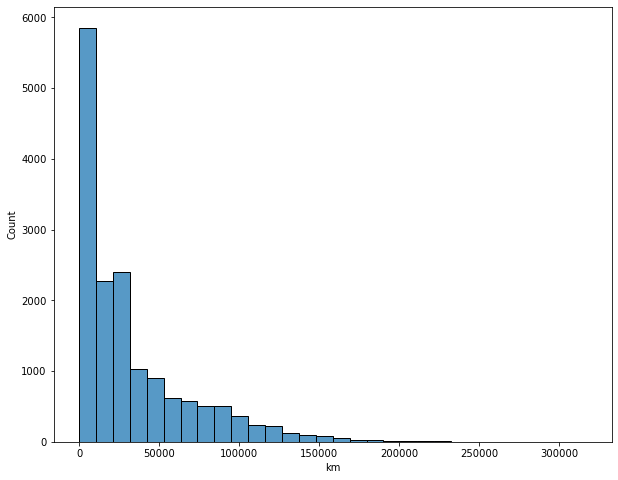

In [476]:
plt.figure(figsize=(10,8))
sns.histplot(df.km, bins=30);

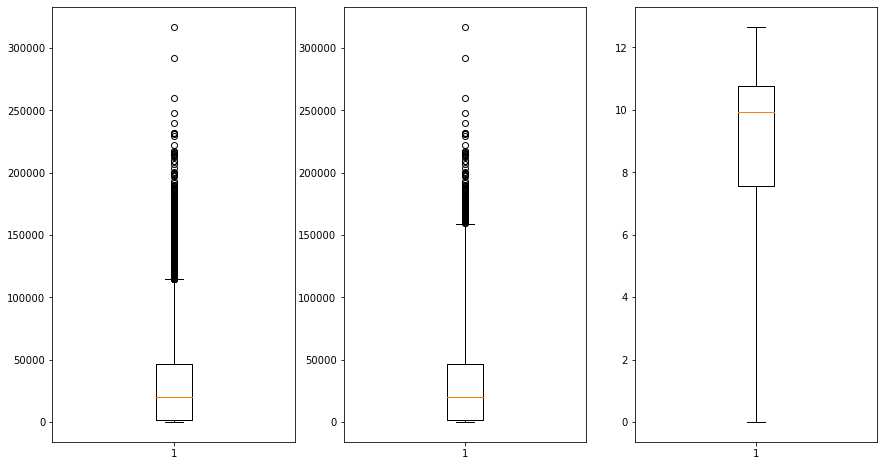

In [477]:
plt.figure(figsize=(20,8))
plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

In [478]:
df[df.km > 150000]["age"].value_counts()

3.00    169
2.00     14
Name: age, dtype: int64

**The "km" column may differ depending on the use of the vehicle. We can say that there is no outlier data for this column.** 

### 2.2 gears

In [479]:
summary("gears")

Column name              :  gears
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  10

Unique values  : 
[ 7.  6.  5.  8.  1.  2. 50.  9.  3.  4.]

Number of values
6.00     8610
5.00     4254
7.00     2810
8.00      225
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: gears, dtype: int64


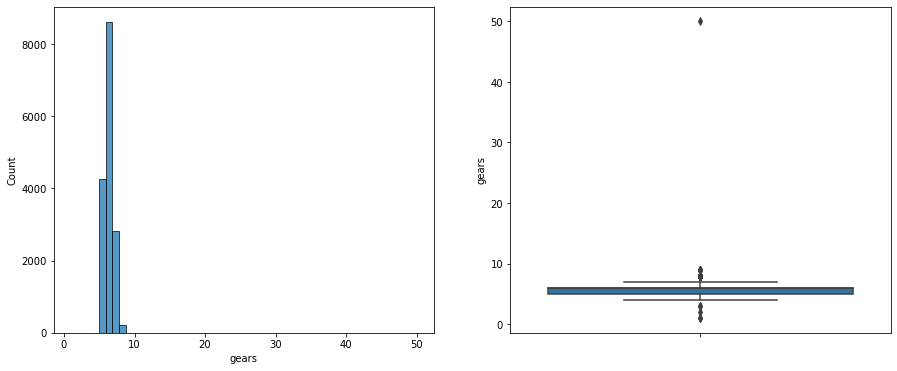

In [480]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.gears, bins=50);

plt.subplot(122)
sns.boxplot(y =df.gears);

In [481]:
df.gears.describe()

count   15913.00
mean        5.94
std         0.79
min         1.00
25%         5.00
50%         6.00
75%         6.00
max        50.00
Name: gears, dtype: float64

In [482]:
df.gears.value_counts()

6.00     8610
5.00     4254
7.00     2810
8.00      225
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: gears, dtype: int64

In [483]:
df[( df.gears < 5 ) | ( df.gears >8 )]["gears"]

8921     1.00
9812     2.00
14375    1.00
14495   50.00
15812    9.00
15814    9.00
15817    3.00
15822    4.00
15823    4.00
15824    9.00
15827    9.00
15845    3.00
15869    9.00
15876    9.00
Name: gears, dtype: float64

In [484]:
outlier_gears = df[( df.gears < 5 ) | ( df.gears >8 )]["gears"].index
outlier_gears

Int64Index([ 8921,  9812, 14375, 14495, 15812, 15814, 15817, 15822, 15823,
            15824, 15827, 15845, 15869, 15876],
           dtype='int64')

In [485]:
df.loc[outlier_gears][["make_model", "body_type", "gearing_type", "gears"]]

make_model body_type    gearing_type  gears
8921       Opel Corsa   Compact  Semi-automatic   1.00
9812       Opel Corsa    Sedans          Manual   2.00
14375    Renault Clio   Compact       Automatic   1.00
14495    Renault Clio    Sedans          Manual  50.00
15812  Renault Espace       Van       Automatic   9.00
15814  Renault Espace       Van       Automatic   9.00
15817  Renault Espace       Van       Automatic   3.00
15822  Renault Espace       Van       Automatic   4.00
15823  Renault Espace       Van       Automatic   4.00
15824  Renault Espace       Van       Automatic   9.00
15827  Renault Espace       Van       Automatic   9.00
15845  Renault Espace       Van       Automatic   3.00
15869  Renault Espace       Van       Automatic   9.00
15876  Renault Espace       Van       Automatic   9.00

In [486]:
for i in df.loc[outlier_gears]["make_model"].unique():
    print("----",i,"----")
    print(df[df.make_model == i]["gears"].value_counts())

---- Opel Corsa ----
5.00    1428
6.00     788
1.00       1
2.00       1
8.00       1
Name: gears, dtype: int64
---- Renault Clio ----
5.00     1170
6.00      663
7.00        3
1.00        1
50.00       1
Name: gears, dtype: int64
---- Renault Espace ----
6.00    844
7.00    135
9.00      6
5.00      2
3.00      2
4.00      2
Name: gears, dtype: int64


In [487]:
df["gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [488]:
fill_most_freq(df, ["make_model", "body_type", "gearing_type"], "gears")

Number of NaN :  0
------------------
6.00    8621
5.00    4257
7.00    2810
8.00     225
Name: gears, dtype: int64


In [489]:
df[df.gears == 8].make_model.value_counts()

Opel Insignia    222
Audi A1            2
Opel Corsa         1
Name: make_model, dtype: int64

In [490]:
outlier_gears = df[( (df.make_model == "Audi A1") | (df.make_model == "Opel Corsa") ) & (df.gears == 8)].index
df.loc[outlier_gears, "gears"] = np.nan

In [491]:
fill_most_freq(df, ["make_model", "body_type", "gearing_type"], "gears")

Number of NaN :  0
------------------
6.00    8622
5.00    4257
7.00    2812
8.00     222
Name: gears, dtype: int64


### 2.3 displacement

In [492]:
df.displacement.value_counts()

1598.00     4758
999.00      2437
1398.00     1314
1399.00      749
1229.00      677
            ... 
2967.00        1
1856.00        1
16000.00       1
1662.37        1
1800.00        1
Name: displacement, Length: 114, dtype: int64

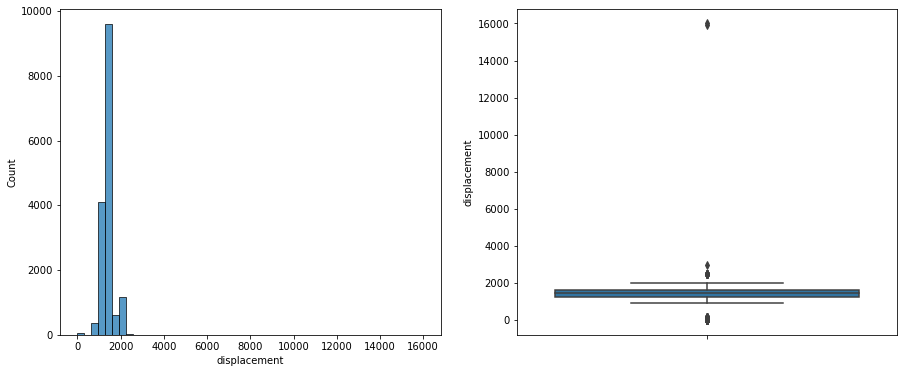

In [493]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.displacement, bins=50);

plt.subplot(122)
sns.boxplot(y =df.displacement);

In [494]:
df.displacement.describe()

count   15913.00
mean     1424.54
std       329.87
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: displacement, dtype: float64

In [495]:
df.displacement.sort_values(ascending=False)

10932   16000.00
7169    15898.00
10771    2967.00
3601     2480.00
3608     2480.00
          ...   
14315       1.00
12835       1.00
12781       1.00
12783       1.00
12501       1.00
Name: displacement, Length: 15913, dtype: float64

In [496]:
df[df.displacement < 890]["displacement"].sort_values(ascending=False)

15579   160.00
15578   160.00
15577   160.00
15576   160.00
15575   160.00
15574   160.00
8128    140.00
7810    139.00
7809    139.00
7811    139.00
7812    139.00
10194   122.00
13912    54.00
10559     2.00
14198     2.00
14321     1.00
14284     1.00
14314     1.00
14315     1.00
14319     1.00
14320     1.00
12484     1.00
14322     1.00
14324     1.00
12499     1.00
14326     1.00
14327     1.00
14328     1.00
12467     1.00
14325     1.00
13904     1.00
12849     1.00
12848     1.00
12501     1.00
12554     1.00
12604     1.00
12670     1.00
12750     1.00
12768     1.00
12769     1.00
12781     1.00
12783     1.00
12786     1.00
12790     1.00
12796     1.00
12798     1.00
12800     1.00
12473     1.00
12823     1.00
12835     1.00
12815     1.00
Name: displacement, dtype: float64

In [497]:
outlier_disp = df[df.displacement < 890]["displacement"].index
df.loc[outlier_disp, "displacement"] = np.nan

outlier_disp = df[df.displacement > 3000]["displacement"].index
df.loc[outlier_disp, "displacement"] = np.nan

In [498]:
disp_median = df.groupby(["make_model", "body_type"])["displacement"].median() 
disp_mean = df.groupby(["make_model", "body_type"])["displacement"].mean()
disp_mode = df.groupby(["make_model", "body_type"])["displacement"].agg(pd.Series.mode)
pd.DataFrame([disp_median, disp_mean, disp_mode], index=["median","mean", "mode"]).T

median    mean              mode
make_model     body_type                                      
Audi A1        Compact        999.00 1158.72            999.00
               Coupe         1298.50 1298.50   [999.0, 1598.0]
               Sedans         999.00 1207.72            999.00
               Station wagon 1395.00 1286.15   [999.0, 1422.0]
               Van           1984.00 1984.00           1984.00
Audi A3        Compact       1598.00 1509.96           1598.00
               Convertible   1968.00 1793.38           1968.00
               Coupe         1598.00 1448.25           1598.00
               Sedans        1598.00 1520.25           1598.00
               Station wagon 1598.00 1417.30           1598.00
Opel Astra     Compact       1406.24 1406.24           1598.00
               Coupe         1381.50 1381.50  [1364.0, 1399.0]
               Off-Road      1399.00 1399.00           1399.00
               Sedans        1399.00 1345.33           1399.00
               Station wagon 1598.00 1493.65           1598.00
Opel Corsa     Compact       1398.00 1347.11           1398.00
               Coupe         1248.00 1256.75           1229.00
               Off-Road      1400.00 1400.00           1400.00
               Sedans        1313.57 1313.57           1398.00
               Transporter   1248.00 1247.29  [1229.0, 1248.0]
               Van           1229.00 1229.00           1229.00
Opel Insignia  Compact       1598.00 1576.04           1598.00
               Coupe         1662.37 1662.37           1662.37
               Off-Road      1956.00 1838.29           1956.00
               Sedans        1598.00 1635.88           1598.00
               Station wagon 1598.00 1692.94           1598.00
               Van           1496.00 1496.00           1496.00
Renault Clio   Compact       1197.00 1163.79           1197.00
               Coupe         1618.00 1618.00           1618.00
               Off-Road      1329.00 1329.00  [1197.0, 1461.0]
               Sedans        1259.97 1279.22           1461.00
               Station wagon 1197.00 1283.80           1461.00
               Transporter   1461.00 1401.29           1461.00
               Van           1461.00 1461.00           1461.00
Renault Duster Off-Road      1598.00 1695.03           1598.00
Renault Espace Compact       1635.50 1653.00  [1598.0, 1653.0]
               Coupe         1678.69 1678.69           1678.69
               Off-Road      1598.00 1598.50           1598.00
               Sedans        1598.00 1674.52           1598.00
               Station wagon 1598.00 1667.34           1598.00
               Transporter   1598.00 1607.18           1598.00
               Van           1600.00 1697.00           1598.00

In [499]:
fill_most_freq(df, ["make_model","body_type"], "displacement")

Number of NaN :  0
------------------
1598.00    4791
999.00     2437
1398.00    1315
1399.00     753
1229.00     677
           ... 
1662.37       1
1496.00       1
1533.00       1
1995.00       1
1800.00       1
Name: displacement, Length: 105, dtype: int64


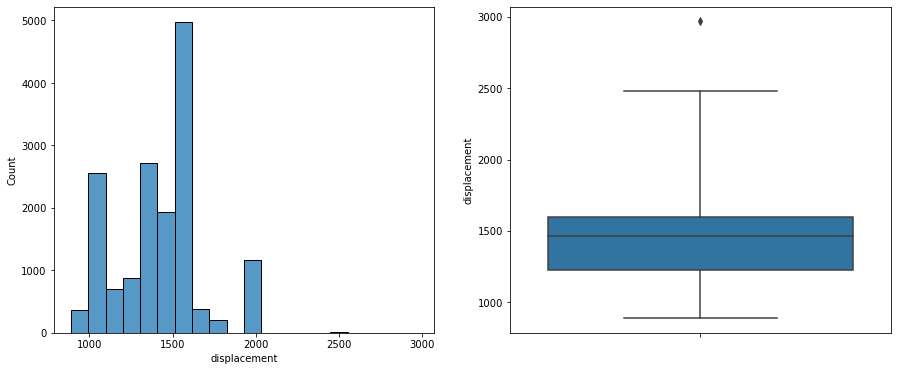

In [500]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.displacement, bins=20);

plt.subplot(122)
sns.boxplot(y =df.displacement, whis=2.5);

### 2.4  nr_of_doors

In [501]:
summary("nr_of_doors")

Column name              :  nr_of_doors
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  6

Unique values  : 
[5. 3. 4. 2. 1. 7.]

Number of values
5.00    11782
4.00     3078
3.00      832
2.00      219
1.00        1
7.00        1
Name: nr_of_doors, dtype: int64


In [502]:
df.nr_of_doors.describe()

count   15913.00
mean        4.66
std         0.64
min         1.00
25%         4.00
50%         5.00
75%         5.00
max         7.00
Name: nr_of_doors, dtype: float64

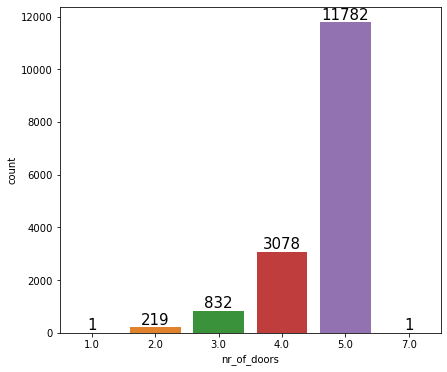

In [503]:
plt.figure(figsize=(15,6))
plt.subplot(121)
ax = sns.countplot(df.nr_of_doors)
ax.bar_label(ax.containers[0], size=15);

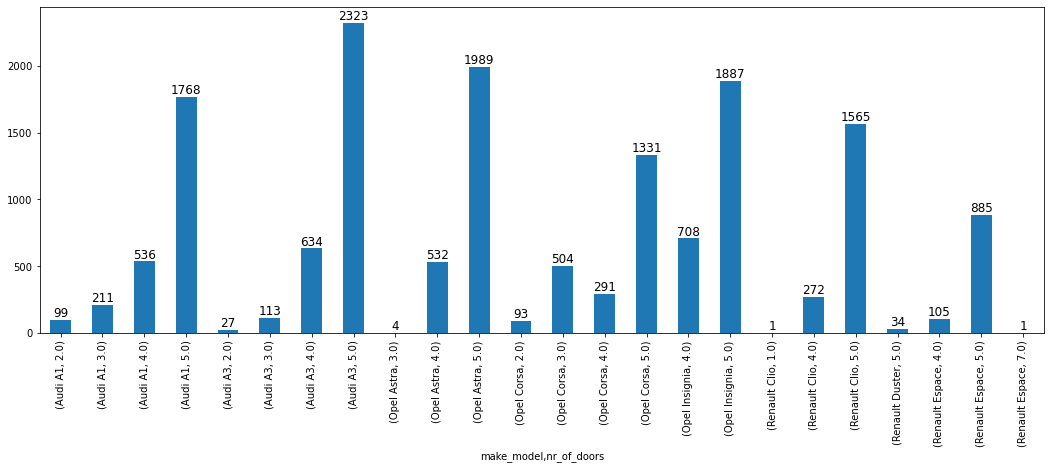

In [504]:

fig = plt.figure(figsize=(18, 6))
ax = df.groupby(["make_model", "nr_of_doors"]).nr_of_doors.count().plot.bar();

for container in ax.containers:
    ax.bar_label(container,size=12);

In [505]:
df[["nr_of_doors", "price"]].corr()

nr_of_doors  price
nr_of_doors         1.00   0.16
price               0.16   1.00

**Mostly 5 and 4 door vehicles are available. Very little correlation with my target column. In this case, whether the vehicle has 4 or 5 doors will not affect the price significantly.**

In [506]:
df.drop(columns="nr_of_doors", inplace=True)

### 2.5 nr_of_seats

In [507]:
summary("nr_of_seats")

Column name              :  nr_of_seats
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  6

Unique values  : 
[5. 4. 6. 3. 2. 7.]

Number of values
5.00    14302
4.00     1127
7.00      362
2.00      119
6.00        2
3.00        1
Name: nr_of_seats, dtype: int64


In [508]:
df.nr_of_seats.describe()

count   15913.00
mean        4.95
std         0.48
min         2.00
25%         5.00
50%         5.00
75%         5.00
max         7.00
Name: nr_of_seats, dtype: float64

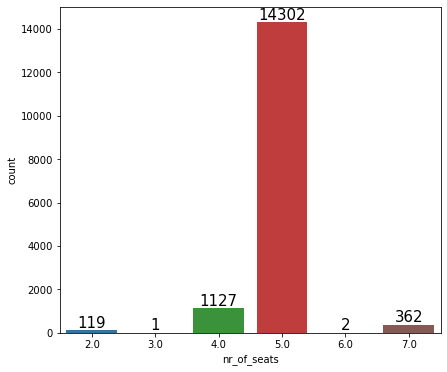

In [509]:
plt.figure(figsize=(15,6))
plt.subplot(121)
ax = sns.countplot(df.nr_of_seats)
ax.bar_label(ax.containers[0], size=15);

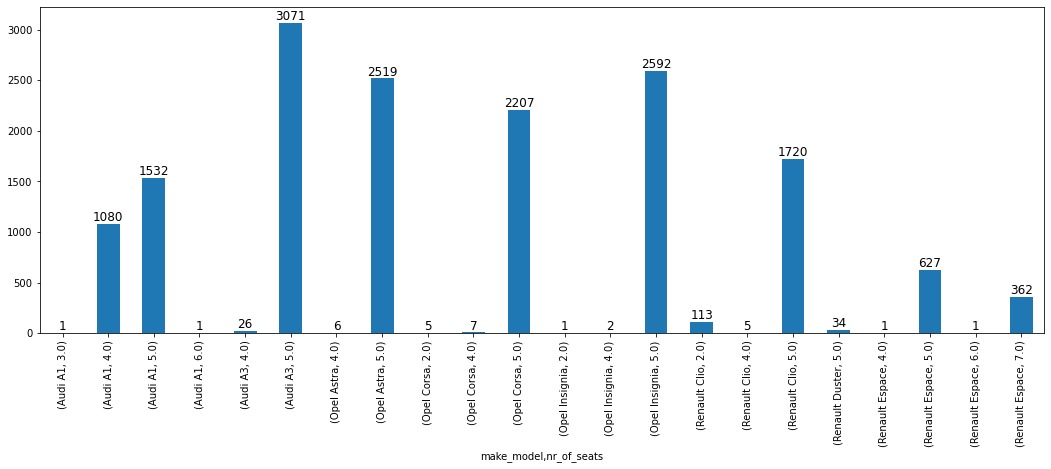

In [510]:

fig = plt.figure(figsize=(18, 6))
ax = df.groupby(["make_model", "nr_of_seats"]).nr_of_seats.count().plot.bar();

for container in ax.containers:
    ax.bar_label(container,size=12);

In [511]:
df[["nr_of_seats", "price"]].corr()

nr_of_seats  price
nr_of_seats         1.00   0.25
price               0.25   1.00

**Mostly 5 and 4-seater vehicles are available.  Very little correlation with my target column. In this case, the fact that the vehicle has 4 or 5 seats is not among the important features that will affect its price.**

In [512]:
df.drop(columns="nr_of_seats", inplace=True)

### 2.6 weight

In [513]:
df.weight.value_counts

<bound method IndexOpsMixin.value_counts of 0       1220.00
1       1255.00
2       1135.00
3       1195.00
4       1135.00
          ...  
15914   1758.00
15915   1708.00
15916   1734.00
15917   1758.00
15918   1685.00
Name: weight, Length: 15913, dtype: float64>

In [514]:
df.weight.describe()

count   15913.00
mean     1337.41
std       200.46
min         1.00
25%      1165.00
50%      1295.00
75%      1472.00
max      2471.00
Name: weight, dtype: float64

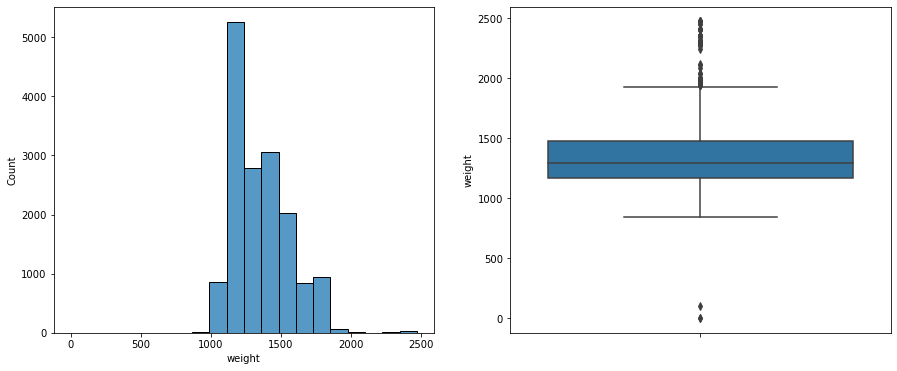

In [515]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.weight, bins=20);

plt.subplot(122)
sns.boxplot(y =df.weight);

In [516]:
df[df.weight < 800][["make_model", "weight"]]

make_model  weight
1143         Audi A1  102.00
8355      Opel Corsa    1.00
12779  Opel Insignia    1.00

In [517]:
df.loc[ df[df.weight < 800].index, "weight"] = np.nan

In [518]:
fill_most_freq(df, ["make_model", "body_type"], "weight")

Number of NaN :  0
------------------
1163.00    1583
1360.00    1419
1487.00     966
1135.00     836
1425.00     744
           ... 
1331.00       1
1132.00       1
1252.00       1
1792.00       1
2037.00       1
Name: weight, Length: 432, dtype: int64


In [519]:
df["weight"].describe()

count   15913.00
mean     1337.65
std       199.67
min       840.00
25%      1165.00
50%      1295.00
75%      1472.00
max      2471.00
Name: weight, dtype: float64

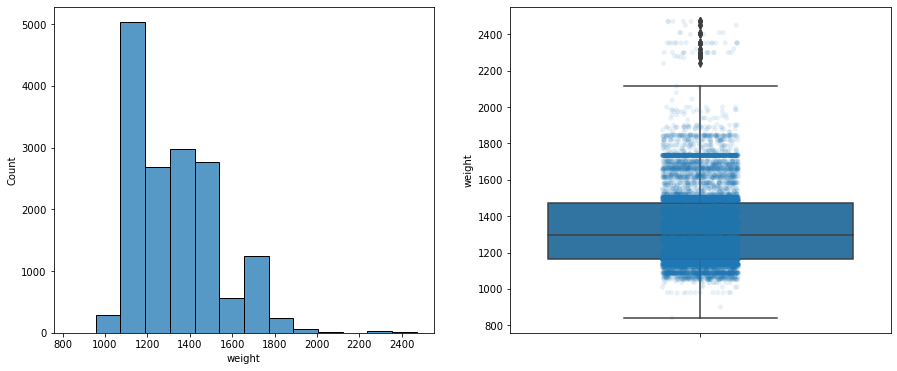

In [520]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.weight, bins=14);

plt.subplot(122)
sns.boxplot(y =df.weight, whis= 2.5)
sns.stripplot(y="weight", data=df, alpha=0.1);

### 2.7 co2_emission

In [521]:
summary("co2_emission")

Column name              :  co2_emission
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  124

Unique values  : 
[ 99.    129.    109.     92.     98.     97.    104.    105.    112.
 103.    102.     95.     91.     94.    117.    123.    106.    108.
 121.    107.    101.    113.    137.    100.    116.    114.    118.
 331.    115.    119.     90.    136.    134.    110.    111.    120.
  89.    142.    126.    122.    128.    127.    138.    130.    125.
  85.    124.    152.     36.     88.    189.    194.    149.    153.
 188.    134.5     1.06   96.    990.    146.    135.    158.     12.087
 141.    172.    154.    150.    167.    174.     93.    133.    131.
 145.    147.    156.     87.      5.    148.    139.    151.    144.
 168.    160.    170.     80.    132.    155.     14.    159.      0.
 143.    140.     82.     12.324  84.    165.     51.    157.    169.
 166.    253.    164.    175.    190.   

In [522]:
df.co2_emission.describe()

count   15913.00
mean      117.71
std        19.68
min         0.00
25%       104.00
50%       117.00
75%       129.00
max       990.00
Name: co2_emission, dtype: float64

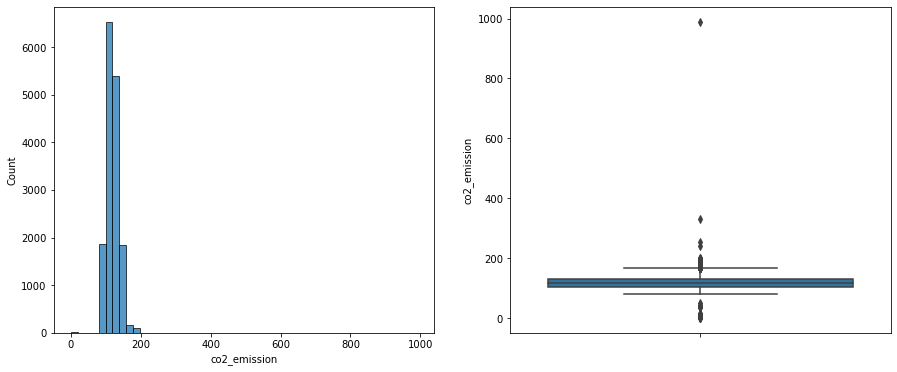

In [523]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.co2_emission, bins=50);

plt.subplot(122)
sns.boxplot(y =df.co2_emission);

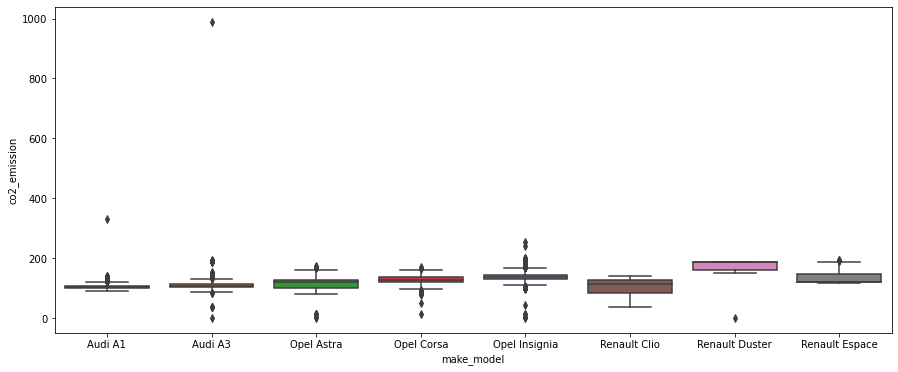

In [524]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "make_model", y = "co2_emission", data= df);

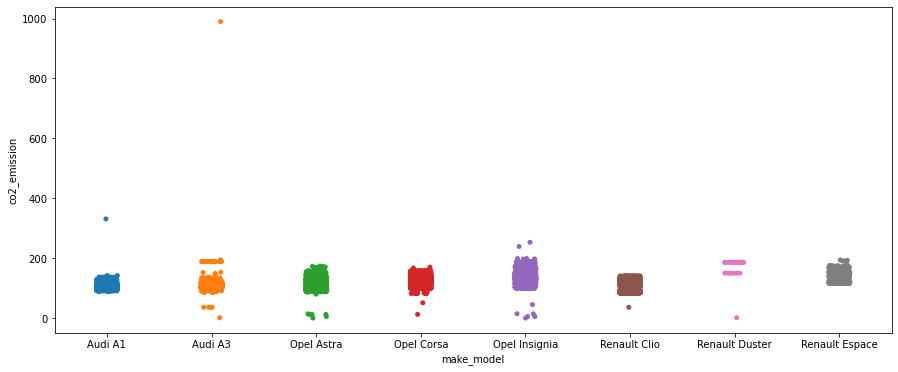

In [525]:
plt.figure(figsize=(15,6))
sns.stripplot(x= "make_model", y = "co2_emission", data= df);

In [526]:
df[df.co2_emission > 300]

make_model body_type  price       km  type inspection_new body_color  \
535     Audi A1   Compact  12990 41200.00  Used            Yes     Silver   
4556    Audi A3    Sedans  23500 27815.00  Used             No       Grey   

     paint_type gearing_type  displacement  weight drive_chain     fuel  \
535    Metallic       Manual        999.00 1180.00       front  Benzine   
4556   Metallic    Automatic       1598.00 1360.00       front   Diesel   

      co2_emission emission_class  gears country_version  previous_owners  \
535         331.00         Euro 4   5.00         Germany             1.00   
4556        990.00         Euro 6   7.00           Italy             1.00   

      hp_kw upholstery_type upholstery_color  cons_comb  age  num_of_extras  
535   70.00           Cloth            Black      13.80 3.00              2  
4556  81.00           Cloth            Black       4.00 1.00              1

In [527]:
df[df.co2_emission < 30]

make_model      body_type  price       km            type  \
4089          Audi A3         Sedans  19500 23644.00            Used   
5818       Opel Astra         Sedans  14990 85182.00            Used   
6397       Opel Astra         Sedans   6950 88000.00            Used   
6578       Opel Astra  Station wagon  17850 29900.00            Used   
6579       Opel Astra  Station wagon  17850 29900.00            Used   
8110       Opel Astra  Station wagon  18380  1020.00            Used   
8217       Opel Astra         Sedans  17850  4500.00  Employee's car   
8542       Opel Corsa        Compact  10950 34800.00            Used   
10566   Opel Insignia  Station wagon  16900 59800.00            Used   
11553   Opel Insignia  Station wagon  18900 34386.00            Used   
11888   Opel Insignia  Station wagon  22990 25583.00            Used   
12343   Opel Insignia         Sedans  19950 15018.00            Used   
13008   Opel Insignia  Station wagon  24700  9800.00            Used   
14902  Renault Duster       Off-Road  10850  1222.21             New   

      inspection_new body_color paint_type gearing_type  displacement  weight  \
4089              No       Blue   Metallic       Manual       1598.00 1360.00   
5818              No     Others   Metallic    Automatic       1399.00 1273.00   
6397              No       Grey   Metallic       Manual       1340.42 1273.00   
6578             Yes     Others   Metallic    Automatic       1399.00 1425.00   
6579             Yes     Others   Metallic    Automatic       1399.00 1425.00   
8110             Yes     Silver   Metallic       Manual        999.00 1425.00   
8217             Yes        Red   Metallic       Manual       1399.00 1273.00   
8542              No       Blue   Metallic    Automatic       1398.00 1163.00   
10566            Yes      Black   Metallic    Automatic       1956.00 1487.00   
11553             No       Blue   Metallic       Manual       1956.00 1633.00   
11888             No       Grey   Metallic    Automatic       1490.00 1487.00   
12343             No      White   Metallic       Manual       1490.00 1503.00   
13008             No       Blue   Metallic       Manual       1598.00 1503.00   
14902             No      White  Uni/basic       Manual       1695.03 1163.00   

      drive_chain     fuel  co2_emission emission_class  gears  \
4089        front   Diesel          1.06         Euro 6   6.00   
5818        front  Benzine         12.09         Euro 6   6.00   
6397        front   Diesel          5.00         Euro 6   6.00   
6578        front  Benzine         12.09         Euro 6   6.00   
6579        front  Benzine         12.09         Euro 6   6.00   
8110        front  Benzine         14.00         Euro 6   5.00   
8217        front  Benzine          0.00         Euro 6   6.00   
8542        front  Benzine         12.32         Euro 6   6.00   
10566       front   Diesel          0.00         Euro 6   6.00   
11553       front   Diesel          5.00         Euro 6   6.00   
11888       front  Benzine         14.46         Euro 6   6.00   
12343       front  Benzine         13.98         Euro 6   6.00   
13008       front   Diesel          5.00         Euro 6   6.00   
14902         4WD  Benzine          1.00         Euro 4   6.00   

      country_version  previous_owners  hp_kw    upholstery_type  \
4089          Germany             1.00  85.00              Cloth   
5818          Germany             1.00 110.00              Cloth   
6397            Italy             1.00  81.00  Part/Full Leather   
6578          Germany             1.00 110.00              Cloth   
6579          Germany             1.00 110.00              Cloth   
8110          Germany             1.00  77.00              Cloth   
8217          Germany             1.00  92.00              Cloth   
8542          Germany             2.00  66.00              Cloth   
10566         Germany             1.00 125.00  Part/Full Leather   
11553         Belgium             1.00 125.

In [528]:
df.loc[df[df.co2_emission > 300].index, "co2_emission"] = np.nan
df.loc[df[df.co2_emission < 30].index, "co2_emission"] = np.nan

In [529]:
fill_most_freq(df,["make_model", "body_type"],"co2_emission")

Number of NaN :  0
------------------
120.00    1001
104.00     781
97.00      631
99.00      593
124.00     577
          ... 
51.00        1
80.00        1
160.00       1
134.50       1
193.00       1
Name: co2_emission, Length: 113, dtype: int64


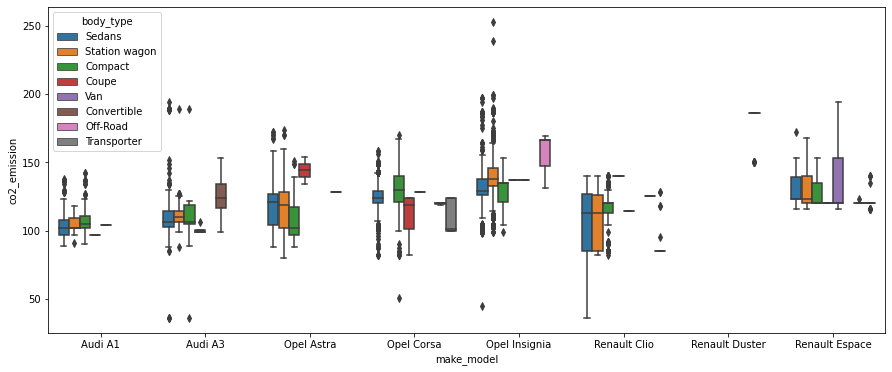

In [530]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "make_model", y = "co2_emission", data= df, hue="body_type");

In [531]:
df[ (df.make_model == "Renault Duster")  &  (df.co2_emission <160) ]
# it isn't outlier. There are enough data

make_model body_type  price      km  type inspection_new  \
14894  Renault Duster  Off-Road  13250 1222.21   New             No   
14895  Renault Duster  Off-Road  16033 1222.21   New             No   
14896  Renault Duster  Off-Road  16033  101.00  Used             No   
14897  Renault Duster  Off-Road  16033 1222.21   New             No   
14898  Renault Duster  Off-Road  16033  101.00  Used             No   
14899  Renault Duster  Off-Road  13250  101.00  Used             No   
14900  Renault Duster  Off-Road  13250 1222.21   New             No   
14901  Renault Duster  Off-Road  13250  101.00  Used             No   

      body_color paint_type gearing_type  displacement  weight drive_chain  \
14894      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14895      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14896      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14897      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14898      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14899      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14900      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   
14901      Black  Uni/basic    Automatic       1998.00 1163.00         4WD   

          fuel  co2_emission emission_class  gears country_version  \
14894  Benzine        150.00         Euro 4   6.00         Germany   
14895  Benzine        150.00         Euro 4   6.00           Japan   
14896  Benzine        150.00         Euro 4   6.00           Japan   
14897  Benzine        150.00         Euro 4   6.00           Japan   
14898  Benzine        150.00         Euro 4   6.00           Japan   
14899  Benzine        150.00         Euro 4   6.00           Japan   
14900  Benzine        150.00         Euro 4   6.00           Japan   
14901  Benzine        150.00         Euro 4   6.00           Japan   

       previous_owners  hp_kw upholstery_type upholstery_color  cons_comb  \
14894             0.00  77.00           Cloth             Grey       4.80   
14895             0.00  77.00           Cloth             Grey       4.80   
14896             0.00  77.00           Cloth             Grey       4.80   
14897             0.00  77.00           Cloth             Grey       4.80   
14898             0.00  77.00           Cloth             Grey       4.80   
14899             0.00  77.00           Cloth             Grey       4.80   
14900             0.00  77.00           Cloth             Grey       4.80   
14901             0.00  77.00           Cloth             Grey       4.80   

       age  num_of_extras  
14894 0.00              1  
14895 0.00              1  
14896 0.00              1  
14897 0.00              1  
14898 0.00              1  
14899 0.00              1  
14900 0.00              1  
14901 0.00              1

In [532]:
df[ (df.make_model == "Audi A3")  &  (df.co2_emission <50)]

make_model body_type  price       km  type inspection_new body_color  \
3356    Audi A3   Compact  24950 57000.00  Used             No       Blue   
3612    Audi A3    Sedans  38450 13800.00  Used             No      Black   
3615    Audi A3    Sedans  35899 20880.00  Used             No      White   
3617    Audi A3    Sedans  38000 12000.00  Used             No       Grey   

     paint_type    gearing_type  displacement  weight drive_chain    fuel  \
3356   Metallic  Semi-automatic       1400.00 1280.00       front  Hybrid   
3612   Metallic  Semi-automatic       1395.00 1615.00       front  Hybrid   
3615   Metallic  Semi-automatic       1395.00 1615.00       front  Hybrid   
3617   Metallic  Semi-automatic       1395.00 1615.00       front  Hybrid   

      co2_emission emission_class  gears country_version  previous_owners  \
3356         36.00         Euro 6   6.00           Italy             1.00   
3612         36.00         Euro 6   6.00     Netherlands             1.00   
3615         36.00         Euro 6   6.00     Netherlands             1.00   
3617         36.00         Euro 6   6.00     Netherlands             1.00   

      hp_kw    upholstery_type upholstery_color  cons_comb  age  num_of_extras  
3356 150.00  Part/Full Leather            Black       4.10 3.00              7  
3612 110.00              Cloth            Black       1.60 1.00              4  
3615 110.00              Cloth            Black       1.60 1.00              1  
3617 110.00  Part/Full Leather             Grey       1.60 1.00              6

In [533]:
df[ (df.make_model == "Opel Corsa")  &  (df.co2_emission <60)]

make_model body_type  price       km  type inspection_new body_color  \
9798  Opel Corsa   Compact   9900 19800.00  Used             No     Silver   

     paint_type gearing_type  displacement  weight drive_chain     fuel  \
9798   Metallic       Manual       1398.00 1163.00       front  Benzine   

      co2_emission emission_class  gears country_version  previous_owners  \
9798         51.00         Euro 6   5.00           Italy             2.00   

      hp_kw upholstery_type upholstery_color  cons_comb  age  num_of_extras  
9798  55.00           Cloth            Black       5.40 1.00              1

In [534]:
df[ (df.make_model == "Opel Insignia")  &  (df.co2_emission <60) | (df.co2_emission >200)]

make_model      body_type  price        km  type inspection_new  \
10513  Opel Insignia  Station wagon  17990 145000.00  Used             No   
10771  Opel Insignia  Station wagon  12000 185000.00  Used             No   
12547  Opel Insignia         Sedans  33950     10.00   New             No   

      body_color paint_type gearing_type  displacement  weight drive_chain  \
10513        Red   Metallic    Automatic       1683.33 1487.00         4WD   
10771      White   Metallic    Automatic       2967.00 2295.00       front   
12547      Black   Metallic    Automatic       1600.00 1503.00       front   

          fuel  co2_emission emission_class  gears country_version  \
10513  Benzine        253.00         Euro 6   6.00         Germany   
10771   Diesel        239.00         Euro 4   6.00           Spain   
12547  Benzine         45.00         Euro 6   6.00     Netherlands   

       previous_owners  hp_kw    upholstery_type upholstery_color  cons_comb  \
10513             1.00 239.00  Part/Full Leather            Black       6.20   
10771             1.00 100.00  Part/Full Leather            Black       9.10   
12547             1.00 147.00  Part/Full Leather            Black       6.30   

       age  num_of_extras  
10513 3.00              9  
10771 3.00             10  
12547 0.00              6

In [535]:
df.loc[df[ (df.make_model == "Audi A3")  &  (df.co2_emission <50)].index, "co2_emission"] = np.nan
df.loc[df[ (df.make_model == "Opel Corsa")  &  (df.co2_emission <60)].index, "co2_emission"] = np.nan
df.loc[df[ (df.make_model == "Opel Insignia")  &  (df.co2_emission <60) | (df.co2_emission >200)].index, "co2_emission"] = np.nan

In [536]:
fill_most_freq(df,["make_model", "body_type"], "co2_emission")

Number of NaN :  0
------------------
120.00    1002
104.00     781
97.00      631
99.00      593
124.00     577
          ... 
160.00       1
190.00       1
80.00        1
134.50       1
193.00       1
Name: co2_emission, Length: 109, dtype: int64


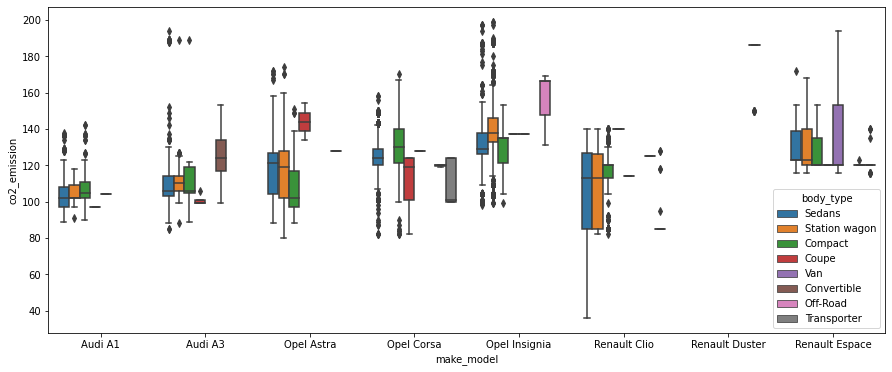

In [537]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "make_model", y = "co2_emission", data= df, hue="body_type");

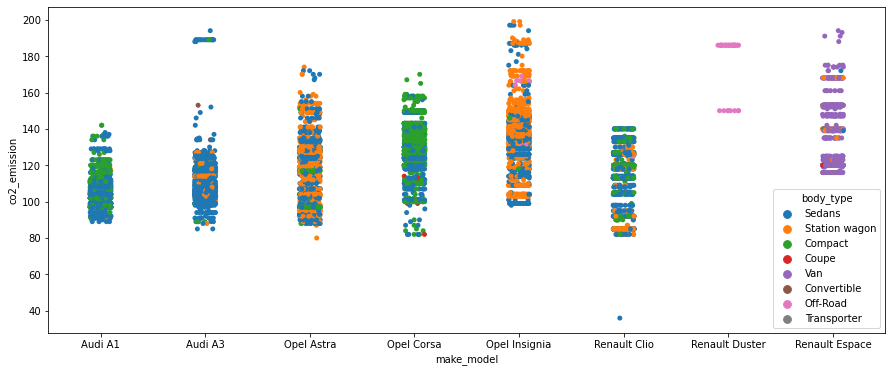

In [538]:
plt.figure(figsize=(15,6))
sns.stripplot(x= "make_model", y = "co2_emission", data= df, hue="body_type");

### 2.8 previous_owners

In [539]:
summary("previous_owners")

Column name              :  previous_owners
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  5

Unique values  : 
[2. 1. 0. 3. 4.]

Number of values
1.00    14147
2.00     1172
0.00      563
3.00       29
4.00        2
Name: previous_owners, dtype: int64


In [540]:
df.previous_owners.describe()

count   15913.00
mean        1.04
std         0.34
min         0.00
25%         1.00
50%         1.00
75%         1.00
max         4.00
Name: previous_owners, dtype: float64

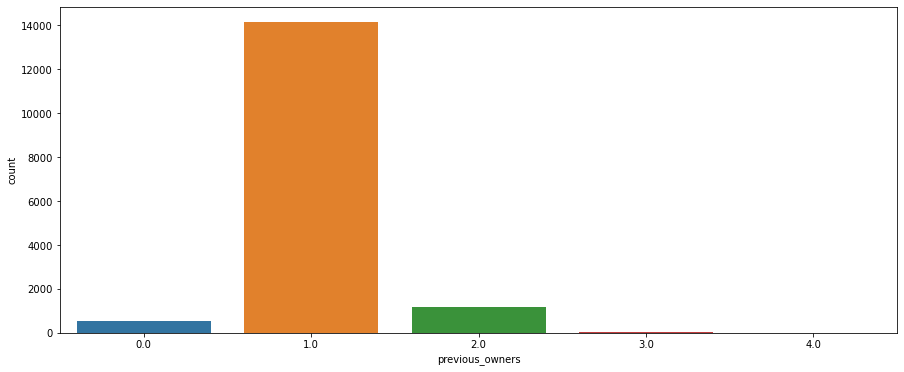

In [541]:
plt.figure(figsize=(15,6))
sns.countplot(df.previous_owners);

In [542]:
df.groupby(["make_model","previous_owners"]).price.describe()

count     mean     std      min      25%  \
make_model     previous_owners                                              
Audi A1        0.00             110.00 21180.98 3804.43 11790.00 19223.00   
               1.00            2261.00 19054.97 4575.06  8999.00 15690.00   
               2.00             240.00 16043.03 2512.71 10600.00 14492.50   
               3.00               2.00 13735.00 2467.80 11990.00 12862.50   
               4.00               1.00 21300.00     NaN 21300.00 21300.00   
Audi A3        0.00             179.00 23740.97 2495.23 15899.00 22388.00   
               1.00            2756.00 20979.29 5135.55  5555.00 17898.00   
               2.00             159.00 18327.67 3302.34 11990.00 15950.00   
               3.00               3.00 14700.00 2771.28 13100.00 13100.00   
Opel Astra     0.00              24.00 18717.71 5010.12 13900.00 14727.50   
               1.00            2303.00 15974.44 5066.01   255.00 12400.00   
               2.00             187.00 13873.76 2463.99  6480.00 11965.00   
               3.00              11.00 13509.82 3369.07 10500.00 10500.00   
Opel Corsa     0.00              39.00 12843.95 3813.85  6299.00 10087.00   
               1.00            1945.00 11318.81 2943.71    13.00  8950.00   
               2.00             232.00  8500.85 1642.65  6300.00  7480.00   
               3.00               3.00  8433.33  808.29  7500.00  8200.00   
Opel Insignia  0.00             104.00 28340.08 7292.60 15700.00 23709.50   
               1.00            2355.00 21481.31 7675.95  8290.00 15750.00   
               2.00             132.00 15983.91 2937.50  9800.00 14200.00   
               3.00               4.00 16372.25 3199.21 12100.00 14980.00   
Renault Clio   0.00              58.00 11905.12 2953.39  7950.00 10990.00   
               1.00            1670.00 12031.00 4283.22  5445.00  9300.00   
               2.00             108.00 10636.47 3257.07  6900.00  8490.00   
               3.00               2.00  8374.50   34.65  8350.00  8362.25   
Renault Duster 0.00              34.00 13230.18 1622.40 10850.00 11925.00   
Renault Espace 0.00              15.00 36874.07 8587.62 24200.00 28465.00   
               1.00             857.00 30589.91 9012.93 12614.00 23900.00   
               2.00             114.00 25568.81 3669.26 17500.00 23122.50   
               3.00               4.00 26745.00  288.73 26490.00 26497.50   
               4.00               1.00 19000.00     NaN 19000.00 19000.00   

                                    50%      75%      max  
make_model     previous_owners                             
Audi A1        0.00            21290.00 22720.00 30000.00  
               1.00            18000.00 22000.00 37900.00  
               2.00            15847.00 17441.25 23250.00  
               3.00            13735.00 14607.50 15480.00  
               4.00            21300.00 21300.00 21300.00  
Audi A3        0.00            23525.00 25295.00 34738.00  
               1.00            20900.00 23500.00 74600.00  
               2.00            18229.00 19695.00 35000.00  
               3.00            13100.00 15500.00 17900.00  
Opel Astra     0.00            18457.50 19105.00 31950.00  
               1.00            15380.00 18080.00 39433.00  
               2.00            14299.00 15990.00 18990.00  
               3.00            10890.00 16925.00 17400.00  
Opel Corsa     0.00            11000.00 17050.00 17500.00  
               1.00            10900.00 13880.00 18622.00  
               2.00             7900.00  8955.00 13600.00  
               3.00             8900.00  8900.00  8900.00  
Opel Insignia  0.00            25500.00 31125.00 52120.00  
               1.00            20000.00 24319.00 49884.00  
               2.00            15740.00 18062.50 23990.00  
               3.00            16945.00 18337.25 19499.00  
Renault Clio   0.00            11070.00 11400.00 26970.00  
               1.00            10652.00 14493.75 31

In [543]:
df[df.previous_owners == 4][["make_model","body_type","price","km","previous_owners"]]

make_model      body_type  price       km  previous_owners
972           Audi A1         Sedans  21300 19700.00             4.00
15256  Renault Espace  Station wagon  19000 57000.00             4.00

In [544]:
df[df.previous_owners == 3][["make_model","body_type","price","km","previous_owners"]]

make_model      body_type  price        km  previous_owners
679           Audi A1        Compact  11990  45000.00             3.00
1290          Audi A1         Sedans  15480  18890.00             3.00
2729          Audi A3  Station wagon  17900  27600.00             3.00
3269          Audi A3  Station wagon  13100 116000.00             3.00
3270          Audi A3        Compact  13100  72265.00             3.00
6103       Opel Astra  Station wagon  10598  56500.00             3.00
6104       Opel Astra         Sedans  10500  68000.00             3.00
6105       Opel Astra         Sedans  10500  69000.00             3.00
6106       Opel Astra  Station wagon  10500  74000.00             3.00
6107       Opel Astra  Station wagon  10500  78000.00             3.00
6406       Opel Astra  Station wagon  10890  63699.00             3.00
6669       Opel Astra  Station wagon  17400  62000.00             3.00
6676       Opel Astra         Sedans  16970  22475.00             3.00
6677       Opel Astra  Station wagon  16950  43847.00             3.00
6682       Opel Astra         Sedans  16900   4000.00             3.00
6685       Opel Astra  Station wagon  16900  25800.00             3.00
8647       Opel Corsa         Sedans   7500  29500.00             3.00
9478       Opel Corsa        Compact   8900  17390.00             3.00
9479       Opel Corsa         Sedans   8900  27355.00             3.00
10524   Opel Insignia         Sedans  17950  42000.00             3.00
10770   Opel Insignia  Station wagon  12100  67000.00             3.00
11284   Opel Insignia         Sedans  15940  32300.00             3.00
11443   Opel Insignia  Station wagon  19499  37125.00             3.00
13560    Renault Clio         Sedans   8399  66000.00             3.00
13568    Renault Clio        Compact   8350  59000.00             3.00
14994  Renault Espace  Station wagon  26500  40000.00             3.00
14996  Renault Espace            Van  26490  46752.00             3.00
15007  Renault Espace  Station wagon  27000  46000.00             3.00
15011  Renault Espace            Van  26990   5992.00             3.00

**In general, as the number of "previous owners" increases, a decrease in vehicle prices. To create a simple data, we can express the vehicles with 2, 3 and 4 previous owners as 2+.**

In [545]:
df.previous_owners.replace([2,3,4], "2+", inplace=True)

In [546]:
df.previous_owners.value_counts()

1.0    14147
2+      1203
0.0      563
Name: previous_owners, dtype: int64

### 2.9 hp_kw

In [547]:
summary("hp_kw")

Column name              :  hp_kw
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  80

Unique values  : 
[ 66. 141.  85.  70.  92. 112.  60.  71.  67. 110.  93. 147.  86. 140.
  87.  81.  82. 135. 132. 100.  96. 162. 150. 294. 228. 270. 137.   9.
 133.  77. 101.  78. 103.   1.  74. 118.  84.  88.  80.  76. 149.  51.
  44.  55.  52.  63.  40.  65.  75. 125. 120. 184. 239. 121. 143. 191.
  89. 195. 127. 122. 154. 155. 104. 123. 146.  90.  56.  53.  54. 164.
   4. 163.  57. 119. 165. 117. 115.  98. 168. 167.]

Number of values
85.00     2542
66.00     2123
81.00     1403
100.00    1313
110.00    1113
70.00      890
125.00     709
51.00      696
55.00      588
118.00     550
92.00      466
121.00     392
147.00     380
77.00      353
56.00      294
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00 

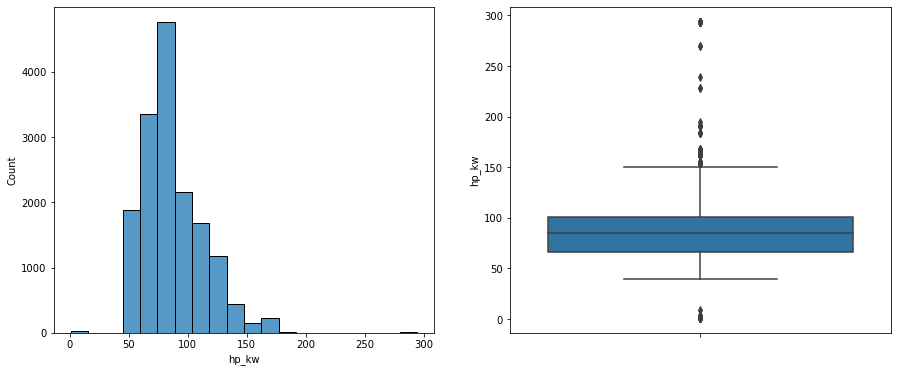

In [548]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.hp_kw, bins=20);

plt.subplot(122)
sns.boxplot(y =df.hp_kw);

In [549]:
df.hp_kw.describe()

count   15913.00
mean       88.37
std        26.84
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp_kw, dtype: float64

In [550]:
np.sort(df.hp_kw.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.])

**When the research was done, it was observed that there were vehicles with at least 40 hp.**

In [551]:
df.hp_kw.loc[df.hp_kw < 40] = np.nan

In [552]:
df.hp_kw.isna().sum()

22

In [553]:
df.groupby(["make_model", "body_type"])["hp_kw"].describe()

count   mean   std    min    25%    50%    75%  \
make_model     body_type                                                        
Audi A1        Compact       1039.00  77.08 12.61  60.00  70.00  70.00  85.00   
               Coupe            2.00  77.50 10.61  70.00  73.75  77.50  81.25   
               Sedans        1551.00  76.36 12.39  60.00  66.00  70.00  85.00   
               Station wagon   21.00  75.14 13.80  60.00  66.00  70.00  85.00   
               Van              1.00 147.00   NaN 147.00 147.00 147.00 147.00   
Audi A3        Compact        182.00  89.95 18.82  81.00  81.00  85.00  92.00   
               Convertible      8.00 124.25 44.35  81.00 110.00 110.00 116.25   
               Coupe            4.00  82.00  2.00  81.00  81.00  81.00  82.00   
               Sedans        2620.00  90.10 20.14  81.00  81.00  85.00  85.00   
               Station wagon  282.00  90.68 16.35  81.00  85.00  85.00  85.00   
Opel Astra     Compact        185.00  87.85 15.82  66.00  81.00  81.00  92.00   
               Coupe            2.00 106.50  4.95 103.00 104.75 106.50 108.25   
               Off-Road         1.00 110.00   NaN 110.00 110.00 110.00 110.00   
               Sedans        1048.00  90.73 17.00  60.00  77.00  81.00 110.00   
               Station wagon 1282.00  95.43 15.49  66.00  81.00 100.00 110.00   
Opel Corsa     Compact       1319.00  61.96  6.87  40.00  51.00  66.00  66.00   
               Coupe           13.00  59.46 10.45  51.00  51.00  55.00  66.00   
               Off-Road         3.00  68.67  4.62  66.00  66.00  66.00  70.00   
               Sedans         868.00  58.18  7.25  51.00  51.00  55.00  66.00   
               Transporter      7.00  54.43  4.28  51.00  51.00  55.00  55.00   
               Van              2.00  51.00  0.00  51.00  51.00  51.00  51.00   
Opel Insignia  Compact         27.00 119.85 18.80 100.00 100.00 121.00 136.00   
               Coupe            1.00  81.00   NaN  81.00  81.00  81.00  81.00   
               Off-Road         7.00 132.00 13.23 122.00 125.00 125.00 136.00   
               Sedans         899.00 110.88 16.66  81.00 100.00 103.00 122.00   
               Station wagon 1656.00 116.34 16.52  81.00 100.00 121.00 125.00   
               Van              1.00 121.00   NaN 121.00 121.00 121.00 121.00   
Renault Clio   Compact        483.00  71.80 25.05  40.00  55.00  56.00  87.00   
               Coupe            1.00 147.00   NaN 147.00 147.00 147.00 147.00   
               Off-Road         2.00  71.00 22.63  55.00  63.00  71.00  79.00   
               Sedans         983.00  73.51 33.71  53.00  55.00  56.00  67.00   
               Station wagon  337.00  64.49 11.49  53.00  54.00  66.00  66.00   
               Transporter     29.00  57.38  4.14  54.00  55.00  56.00  56.00   
               Van              2.00  55.00  0.00  55.00  55.00  55.00  55.00   
Renault Duster Off-Road        34.00  77.12  0.69  77.00  77.00  77.00  77.00   
Renault Espace Compact          6.00 135.67 20.10 118.00 118.25 133.00 147.00   
               Coupe            2.00 141.50 33.23 118.00 129.75 141.50 153.25   
               Off-Road         8.00 118.00  0.00 118.00 118.00 118.00 118.00   
               Sedans          19.00 126.74 20.14  96.00 118.00 118.00 147.00   
               Station wagon   91.00 130.53 19.98  96.00 118.00 118.00 147.00   
               Transporter     52.00 116.71 10.69  96.00 118.00 118.00 118.00   
               Van            811.00 131.18 21.67  96.00 118.00 118.00 147.00   

                                max  
make_model     body_type             
Audi A1        Compact       147.00  
               Coupe          85.00  
               Sedans        147.00  
               Station wagon 110.00  
               Van           147.00  
Audi A3        Compact       294.00  
               Convertible   228.00  
               Coupe          85.00  
               Sedans        294.00  
               Station wagon 294.00  
Opel Astra

In [554]:
fill_most_freq(df, ["make_model", "body_type"], "hp_kw" )

Number of NaN :  0
------------------
85.00     2543
66.00     2123
81.00     1403
100.00    1316
110.00    1117
70.00      890
125.00     713
51.00      703
55.00      588
118.00     552
92.00      466
121.00     392
147.00     380
77.00      353
56.00      295
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
120.00       8
104.00       8
112.00       7
191.00       7
155.00       6
117.00       6
184.00       5
65.00        4
76.00        4
90.00        4
98.00        3
168.00       3
149.00       3
80.00        3
93.00        3
143.00       2
86.00        2
140.00       2
150.00       2
228.00       2
270.00       2
53.00        2
167.00       2
63.00        2
40.00        2
12

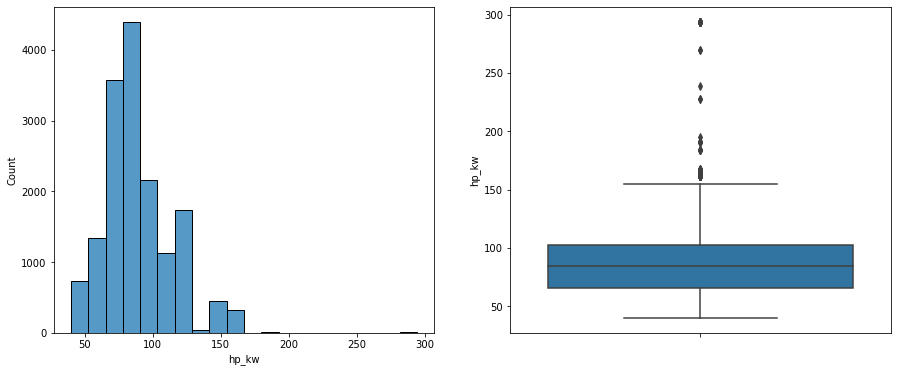

In [555]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.hp_kw, bins=20);

plt.subplot(122)
sns.boxplot(y =df.hp_kw);

**Let's observe vehicles with high hp**

In [556]:
df[df.hp_kw > 200][["make_model","body_type","price", "hp_kw"]]

make_model      body_type  price  hp_kw
3587         Audi A3         Sedans  64900 294.00
3590         Audi A3         Sedans  62900 294.00
3592         Audi A3         Sedans  56900 294.00
3593         Audi A3         Sedans  58500 294.00
3594         Audi A3         Sedans  58990 228.00
3595         Audi A3  Station wagon  63900 294.00
3596         Audi A3         Sedans  57400 294.00
3597         Audi A3    Convertible  56100 228.00
3598         Audi A3         Sedans  55000 294.00
3599         Audi A3         Sedans  55000 294.00
3600         Audi A3         Sedans  53000 294.00
3601         Audi A3         Sedans  51900 294.00
3602         Audi A3         Sedans  51900 294.00
3603         Audi A3         Sedans  52000 294.00
3604         Audi A3         Sedans  50000 294.00
3605         Audi A3         Sedans  51999 294.00
3606         Audi A3         Sedans  49900 294.00
3608         Audi A3         Sedans  42500 270.00
3609         Audi A3         Sedans  41000 270.00
3610         Audi A3         Sedans  45890 294.00
3648         Audi A3         Sedans  74600 294.00
3649         Audi A3        Compact  67600 294.00
10513  Opel Insignia  Station wagon  17990 239.00

In [557]:
df[(df.hp_kw > 100) & (df.make_model =="Audi A3")].groupby(["make_model","body_type","hp_kw"]).price.describe()[:100]

count     mean     std      min      25%  \
make_model body_type     hp_kw                                              
Audi A3    Compact       110.00  15.00 25249.33 7908.35 13990.00 19370.00   
                         112.00   1.00 17894.00     NaN 17894.00 17894.00   
                         135.00   3.00 15950.00    0.00 15950.00 15950.00   
                         150.00   1.00 24950.00     NaN 24950.00 24950.00   
                         294.00   1.00 67600.00     NaN 67600.00 67600.00   
           Convertible   110.00   5.00 24848.60 9248.72 10893.00 20000.00   
                         135.00   1.00 22000.00     NaN 22000.00 22000.00   
                         228.00   1.00 56100.00     NaN 56100.00 56100.00   
           Sedans        110.00 420.00 21923.89 4832.67 12500.00 17963.75   
                         132.00   1.00 14990.00     NaN 14990.00 14990.00   
                         133.00   1.00 19500.00     NaN 19500.00 19500.00   
                         135.00  20.00 24835.30 7496.99 14990.00 18117.25   
                         137.00   1.00 21990.00     NaN 21990.00 21990.00   
                         140.00   1.00 25600.00     NaN 25600.00 25600.00   
                         162.00   1.00 25000.00     NaN 25000.00 25000.00   
                         228.00   1.00 58990.00     NaN 58990.00 58990.00   
                         270.00   2.00 41750.00 1060.66 41000.00 41375.00   
                         294.00  16.00 55736.81 6989.24 45890.00 51900.00   
           Station wagon 110.00  63.00 20433.08 4921.06  5555.00 16980.00   
                         294.00   1.00 63900.00     NaN 63900.00 63900.00   

                                     50%      75%      max  
make_model body_type     hp_kw                              
Audi A3    Compact       110.00 24860.00 28619.00 41495.00  
                         112.00 17894.00 17894.00 17894.00  
                         135.00 15950.00 15950.00 15950.00  
                         150.00 24950.00 24950.00 24950.00  
                         294.00 67600.00 67600.00 67600.00  
           Convertible   110.00 29500.00 30900.00 32950.00  
                         135.00 22000.00 22000.00 22000.00  
                         228.00 56100.00 56100.00 56100.00  
           Sedans        110.00 22000.00 25410.00 38450.00  
                         132.00 14990.00 14990.00 14990.00  
                         133.00 19500.00 19500.00 19500.00  
                         135.00 24700.00 30550.00 38000.00  
                         137.00 21990.00 21990.00 21990.00  
                         140.00 25600.00 25600.00 25600.00  
                         162.00 25000.00 25000.00 25000.00  
                         228.00 58990.00 58990.00 58990.00  
                         270.00 41750.00 42125.00 42500.00  
                         294.00 54000.00 57675.00 74600.00  
           Station wagon 110.00 19565.00 25325.00 27225.00  
                         294.00 63900.00 63900.00 63900.00

**As the hp value increases, the price increases. The hp values here are not outliers.**

### 2.10 cons_comb

In [558]:
summary("cons_comb")

Column name              :  cons_comb
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  58

Unique values  : 
[ 3.8   5.6   4.1   3.5   3.7   4.6   4.9   4.2   4.5   4.4   4.3   3.9
  3.6   3.4   5.1   5.2   4.8   5.8   4.7  13.8   6.4   5.4   5.9   6.5
  6.    5.3   4.    5.5   3.3   3.2   6.6   8.3   7.1   8.1   1.6   6.7
  6.2   7.3   6.3   5.7   6.1   6.8   7.5   7.4   7.8   3.1   6.9   5.
  7.2   7.6   9.1   8.6   8.7   7.9   5.85  6.45 36.    1.2 ]

Number of values
5.40     1035
5.60      852
4.70      845
5.30      830
3.80      801
5.10      794
3.90      770
5.20      758
4.80      746
4.10      651
4.40      625
4.20      589
4.60      545
4.50      523
3.70      468
3.30      462
5.90      411
4.90      392
5.50      384
4.00      352
5.70      343
6.20      320
4.30      308
3.50      288
3.60      251
6.40      221
6.30      212
6.10      184
5.80      164
6.80      159
6.60      148
3.40      130
7.

In [559]:
df.cons_comb.describe()

count   15913.00
mean        4.85
std         0.92
min         1.20
25%         4.10
50%         4.80
75%         5.40
max        36.00
Name: cons_comb, dtype: float64

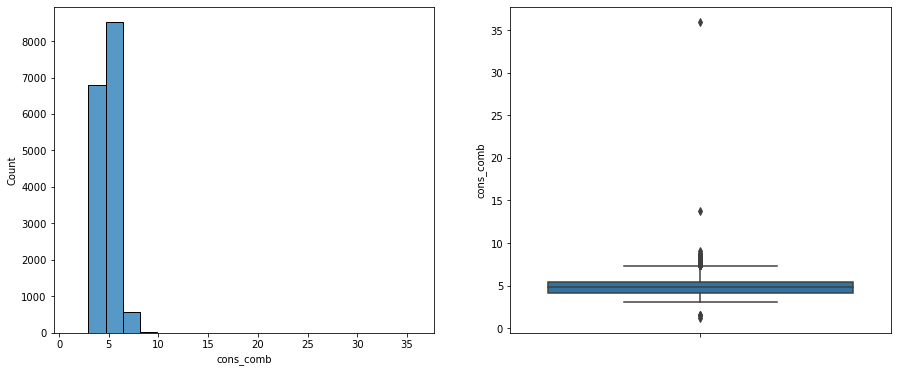

In [560]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.cons_comb, bins=20);

plt.subplot(122)
sns.boxplot(y =df.cons_comb);

In [561]:
df[df.cons_comb > 10][["make_model","body_type","cons_comb"]]

make_model body_type  cons_comb
535         Audi A1   Compact      13.80
13397  Renault Clio    Sedans      36.00

<AxesSubplot:ylabel='cons_comb'>

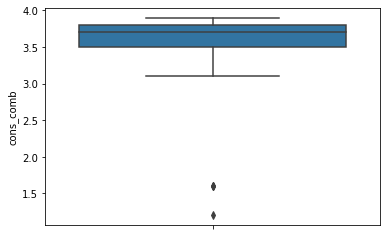

In [562]:
sns.boxplot(y = df[df.cons_comb < 4]["cons_comb"])

In [563]:
df[df.cons_comb < 3][["make_model","body_type","cons_comb"]]

make_model body_type  cons_comb
3612        Audi A3    Sedans       1.60
3615        Audi A3    Sedans       1.60
3617        Audi A3    Sedans       1.60
13678  Renault Clio  Off-Road       1.20

In [564]:
df.cons_comb.loc[df.cons_comb > 10] = np.nan
df.cons_comb.loc[df.cons_comb < 3] = np.nan

In [565]:
fill_most_freq(df, ["make_model", "body_type", "fuel"], "cons_comb" )

Number of NaN :  0
------------------
5.40    1035
5.60     852
4.70     845
5.30     830
3.80     801
5.10     794
3.90     773
5.20     758
4.80     746
4.10     651
4.40     626
4.20     589
4.60     545
4.50     523
3.70     468
3.30     463
5.90     411
4.90     392
5.50     385
4.00     352
5.70     343
6.20     320
4.30     308
3.50     288
3.60     251
6.40     221
6.30     212
6.10     184
5.80     164
6.80     159
6.60     148
3.40     130
7.40      66
6.50      46
6.70      42
7.10      38
6.90      27
3.20      25
8.30      20
7.60      16
6.00      12
5.85       7
7.80       7
3.10       7
7.20       6
5.00       5
7.50       4
8.60       4
8.70       3
7.90       3
6.45       3
8.10       2
7.30       2
9.10       1
Name: cons_comb, dtype: int64


### 2.11 age

In [566]:
summary("age")

Column name              :  age
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  4

Unique values  : 
[3. 2. 1. 0.]

Number of values
1.00    4522
0.00    4434
3.00    3678
2.00    3279
Name: age, dtype: int64


### 2.12 Num_of_Extras

In [567]:
summary("num_of_extras")

Column name              :  num_of_extras
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  10

Unique values  : 
[ 3  4  2  1  6  5  7  8 10  9]

Number of values
1     7012
2     3391
3     2683
4     1404
5      743
6      410
7      175
8       60
9       28
10       7
Name: num_of_extras, dtype: int64


### 2.13 price

In [568]:
summary("price")

Column name              :  price
--------------------------------
Total missing value      :  0
Percentage of missing    :  0.0
Number of unique values  :  2956

Unique values  : 
[15770 14500 14640 ... 41390 39885 39875]

Number of values
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


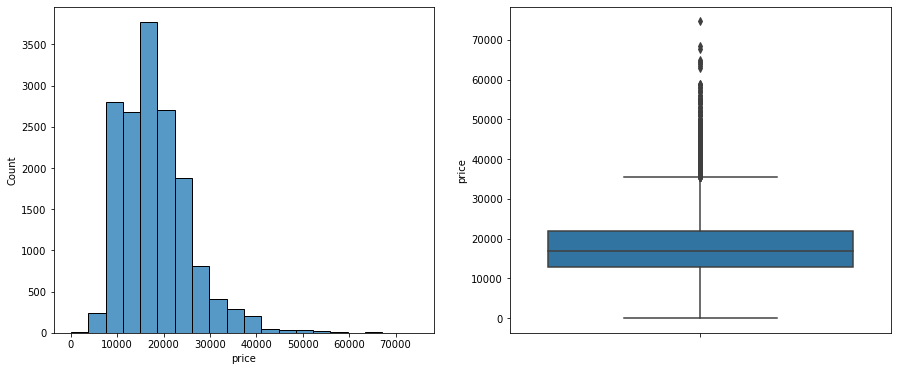

In [569]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(df.price, bins=20);

plt.subplot(122)
sns.boxplot(y =df.price);

In [570]:
df.price.describe()

count   15913.00
mean    18020.00
std      7386.76
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [571]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [572]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [573]:
df.drop(drop_index, axis=0, inplace=True)

**I dropped outliers because it wouldn't be correct to manipulate the target column directly**

In [574]:
df.price.sort_values().tail(10)

3594     58990
3590     62900
15833    63477
3595     63900
15831    64298
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, dtype: int64

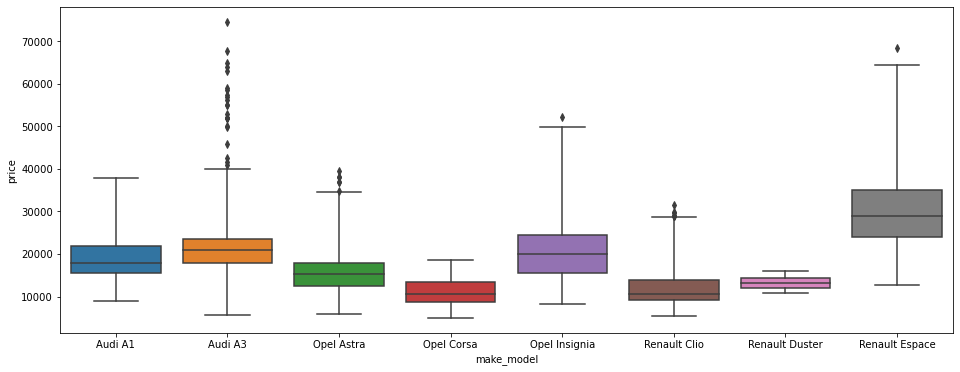

In [575]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

**When we examine the boxplot, there are too many outliers for the Audi-A3. There seems to be a continuity in the increase of these values. It would not be correct to take these values as outliers.**

## 3. Final Data

In [576]:
df.head(3).T

0          1          2
make_model          Audi A1    Audi A1    Audi A1
body_type            Sedans     Sedans     Sedans
price                 15770      14500      14640
km                 56013.00   80000.00   83450.00
type                   Used       Used       Used
inspection_new          Yes         No         No
body_color            Black        Red      Black
paint_type         Metallic   Metallic   Metallic
gearing_type      Automatic  Automatic  Automatic
displacement        1422.00    1798.00    1598.00
weight              1220.00    1255.00    1135.00
drive_chain           front      front      front
fuel                 Diesel    Benzine     Diesel
co2_emission          99.00     129.00      99.00
emission_class       Euro 6     Euro 6     Euro 6
gears                  7.00       7.00       7.00
country_version     Germany    Germany    Germany
previous_owners          2+       1.00       1.00
hp_kw                 66.00     141.00      85.00
upholstery_type       Cloth      Cloth      Cloth
upholstery_color      Black       Grey      Black
cons_comb              3.80       5.60       3.80
age                    3.00       2.00       3.00
num_of_extras             3          4          2

In [590]:
df.shape

(15909, 24)

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15909 entries, 0 to 15918
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make_model        15909 non-null  object 
 1   body_type         15909 non-null  object 
 2   price             15909 non-null  int64  
 3   km                15909 non-null  float64
 4   type              15909 non-null  object 
 5   inspection_new    15909 non-null  object 
 6   body_color        15909 non-null  object 
 7   paint_type        15909 non-null  object 
 8   gearing_type      15909 non-null  object 
 9   displacement      15909 non-null  float64
 10  weight            15909 non-null  float64
 11  drive_chain       15909 non-null  object 
 12  fuel              15909 non-null  object 
 13  co2_emission      15909 non-null  float64
 14  emission_class    15909 non-null  object 
 15  gears             15909 non-null  float64
 16  country_version   15909 non-null  object

In [578]:
df.select_dtypes(include="object")

make_model body_type            type inspection_new body_color  \
0             Audi A1    Sedans            Used            Yes      Black   
1             Audi A1    Sedans            Used             No        Red   
2             Audi A1    Sedans            Used             No      Black   
3             Audi A1    Sedans            Used             No     Others   
4             Audi A1    Sedans            Used            Yes      Black   
...               ...       ...             ...            ...        ...   
15914  Renault Espace       Van             New             No       Grey   
15915  Renault Espace       Van            Used             No       Grey   
15916  Renault Espace       Van  Pre-registered            Yes      White   
15917  Renault Espace       Van  Pre-registered             No       Grey   
15918  Renault Espace       Van   Demonstration            Yes       Grey   

      paint_type gearing_type drive_chain     fuel emission_class  \
0       Metallic    Automatic       front   Diesel         Euro 6   
1       Metallic    Automatic       front  Benzine         Euro 6   
2       Metallic    Automatic       front   Diesel         Euro 6   
3       Metallic    Automatic       front   Diesel         Euro 6   
4       Metallic    Automatic       front   Diesel         Euro 6   
...          ...          ...         ...      ...            ...   
15914   Metallic    Automatic       front   Diesel         Euro 6   
15915   Metallic    Automatic       front  Benzine         Euro 6   
15916   Metallic    Automatic       front   Diesel         Euro 6   
15917   Metallic    Automatic       front   Diesel         Euro 6   
15918   Metallic    Automatic         4WD  Benzine         Euro 6   

      country_version previous_owners    upholstery_type upholstery_color  
0             Germany              2+              Cloth            Black  
1             Germany            1.00              Cloth             Grey  
2             Germany            1.00              Cloth            Black  
3             Germany            1.00              Cloth            Black  
4             Germany            1.00              Cloth            Black  
...               ...             ...                ...              ...  
15914         Germany            1.00  Part/Full Leather            Brown  
15915         Germany            1.00              Cloth            Brown  
15916         Austria            1.00  Part/Full Leather            Black  
15917         Austria            1.00  Part/Full Leather            Black  
15918         Germany            1.00  Part/Full Leather            Brown  

[15909 rows x 14 columns]

**"previous owner" must be a column in int format. For this we will just write 2 for 2+ values. Description change for ML should be noted**

In [582]:
df.previous_owners.value_counts()

1.0    14143
2+      1203
0.0      563
Name: previous_owners, dtype: int64

In [583]:
df.previous_owners = df.previous_owners.replace("2+","2").astype("float")

In [584]:
df.previous_owners.value_counts()

1.00    14143
2.00     1203
0.00      563
Name: previous_owners, dtype: int64

In [585]:
df.select_dtypes(exclude="object")

price       km  displacement  weight  co2_emission  gears  \
0      15770 56013.00       1422.00 1220.00         99.00   7.00   
1      14500 80000.00       1798.00 1255.00        129.00   7.00   
2      14640 83450.00       1598.00 1135.00         99.00   7.00   
3      14500 73000.00       1422.00 1195.00         99.00   6.00   
4      16790 16200.00       1422.00 1135.00        109.00   7.00   
...      ...      ...           ...     ...           ...    ...   
15914  39950  1666.53       1997.00 1758.00        139.00   6.00   
15915  39885  9900.00       1798.00 1708.00        168.00   7.00   
15916  39875    15.00       1997.00 1734.00        139.00   6.00   
15917  39700    10.00       1997.00 1758.00        139.00   6.00   
15918  40999  1666.53       1798.00 1685.00        153.00   6.00   

       previous_owners  hp_kw  cons_comb  age  num_of_extras  
0                 2.00  66.00       3.80 3.00              3  
1                 1.00 141.00       5.60 2.00              4  
2                 1.00  85.00       3.80 3.00              2  
3                 1.00  66.00       3.80 3.00              3  
4                 1.00  66.00       4.10 3.00              4  
...                ...    ...        ...  ...            ...  
15914             1.00 147.00       5.30 0.00              2  
15915             1.00 165.00       7.40 0.00              3  
15916             1.00 146.00       5.30 0.00              1  
15917             1.00 147.00       5.30 0.00              2  
15918             1.00 165.00       6.80 0.00              2  

[15909 rows x 11 columns]

In [589]:
def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.7 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.7 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df.corr().style.applymap(color_correlation)

In [706]:
df.to_csv("final_auto_scout.csv", index=False)

**We finished data cleaning, missing values and outliers steps. The data is ready to go machine learning model. In this step, we can drop some columns from the data which isn't affected our ML mission. Let's continue with analyzing and visualization the data**

## <p style="background-color:#033E3E; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Data Visualization</p>

##  Average, minimum and maximum selling prices of vehicles by body type

In [591]:
df.groupby(['make_model', 'body_type']).agg({'price': ['mean', 'min', 'max']})

price              
                                 mean    min    max
make_model     body_type                           
Audi A1        Compact       19189.37   9950  31990
               Coupe         14925.00  13950  15900
               Sedans        18659.99   8999  37900
               Station wagon 17811.38  12950  28999
               Van           29000.00  29000  29000
Audi A3        Compact       19024.47  12900  67600
               Convertible   27905.38  10893  56100
               Coupe         17745.00  16990  19000
               Sedans        21151.12  10550  74600
               Station wagon 20684.35   5555  63900
Opel Astra     Compact       16199.76   8450  39433
               Coupe         22240.00  14490  29990
               Off-Road      18590.00  18590  18590
               Sedans        15962.20   6500  32950
               Station wagon 15676.68   6000  34900
Opel Corsa     Compact       11674.34   4990  18622
               Coupe          8772.31   6900  11100
               Off-Road       8166.67   7900   8700
               Sedans        10217.44   4950  18490
               Transporter    7650.00   5250  10500
               Van            7900.00   7900   7900
Opel Insignia  Compact       28590.07  10350  49884
               Coupe         17094.00  17094  17094
               Off-Road      29451.29  12750  34776
               Sedans        21266.00   8600  49350
               Station wagon 21431.87   8290  52120
               Van           20980.00  20980  20980
Renault Clio   Compact       12649.63   5800  29740
               Coupe         17990.00  17990  17990
               Off-Road      12845.00   7700  17990
               Sedans        11969.88   5445  31500
               Station wagon 11126.86   5900  20800
               Transporter    8490.17   5900  10798
               Van            9650.00   9400   9900
Renault Duster Off-Road      13230.18  10850  16033
Renault Espace Compact       30046.67  17900  43000
               Coupe         30567.00  26994  34140
               Off-Road      25762.50  14900  32900
               Sedans        30052.43  18999  48498
               Station wagon 27314.66  16900  52990
               Transporter   22606.48  14999  32700
               Van           30912.09  12614  68320

In [608]:
mean_min_max_price = df.groupby(['make_model']).agg({'price': ['max', 'mean', 'min']})
mean_min_max_price

price                
                  max     mean    min
make_model                           
Audi A1         37900 18864.69   8999
Audi A3         74600 20996.69   5555
Opel Astra      39433 15840.38   6000
Opel Corsa      18622 11061.84   4950
Opel Insignia   52120 21468.67   8290
Renault Clio    31500 11941.11   5445
Renault Duster  16033 13230.18  10850
Renault Espace  68320 30080.21  12614

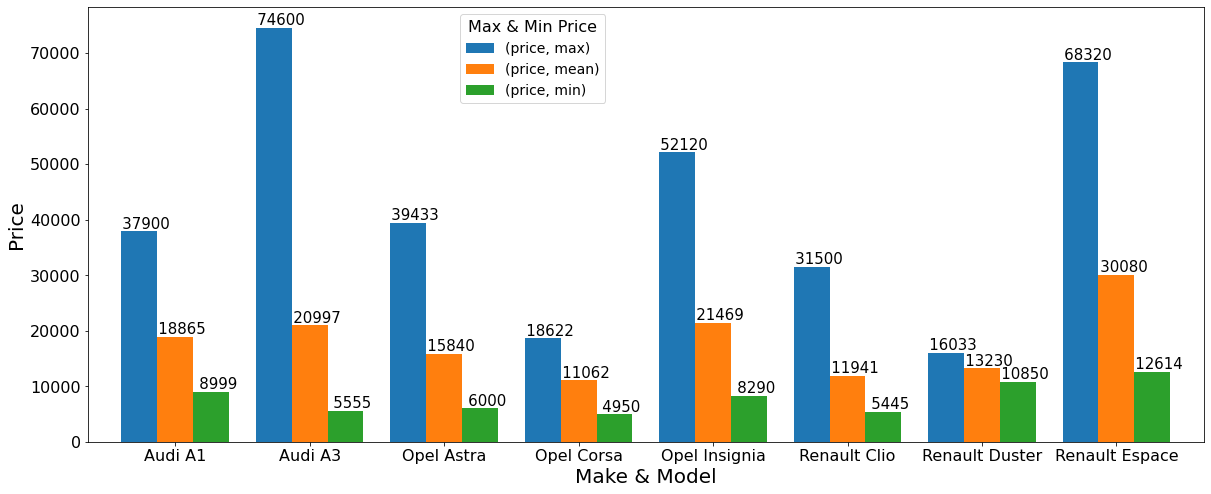

In [646]:
ax = mean_min_max_price.plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container ,fmt="   %.f", fontsize=15, )
    
ax.set_xticklabels(mean_min_max_price.index)
ax.set_xlabel('Make & Model', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
plt.legend(title="Max & Min Price",title_fontsize=16, prop={'size': 14}, bbox_to_anchor=(0.47, 1));

## Average kilometer of the vehicles according to their body types

In [696]:
avg_km = df.groupby(["make_model", "body_type"]).km.mean()
avg_km

make_model      body_type    
Audi A1         Compact         20658.70
                Coupe           38650.00
                Sedans          22701.09
                Station wagon   22421.05
                Van              3000.00
Audi A3         Compact         62449.70
                Convertible     20532.88
                Coupe           26876.50
                Sedans          37164.23
                Station wagon   34776.15
Opel Astra      Compact         28041.70
                Coupe           11303.27
                Off-Road        12607.00
                Sedans          26419.38
                Station wagon   46588.94
Opel Corsa      Compact         19848.78
                Coupe           33261.58
                Off-Road        50729.00
                Sedans          31991.64
                Transporter     52021.36
                Van             33633.00
Opel Insignia   Compact         21233.54
                Coupe           28142.00
                Off-Road   

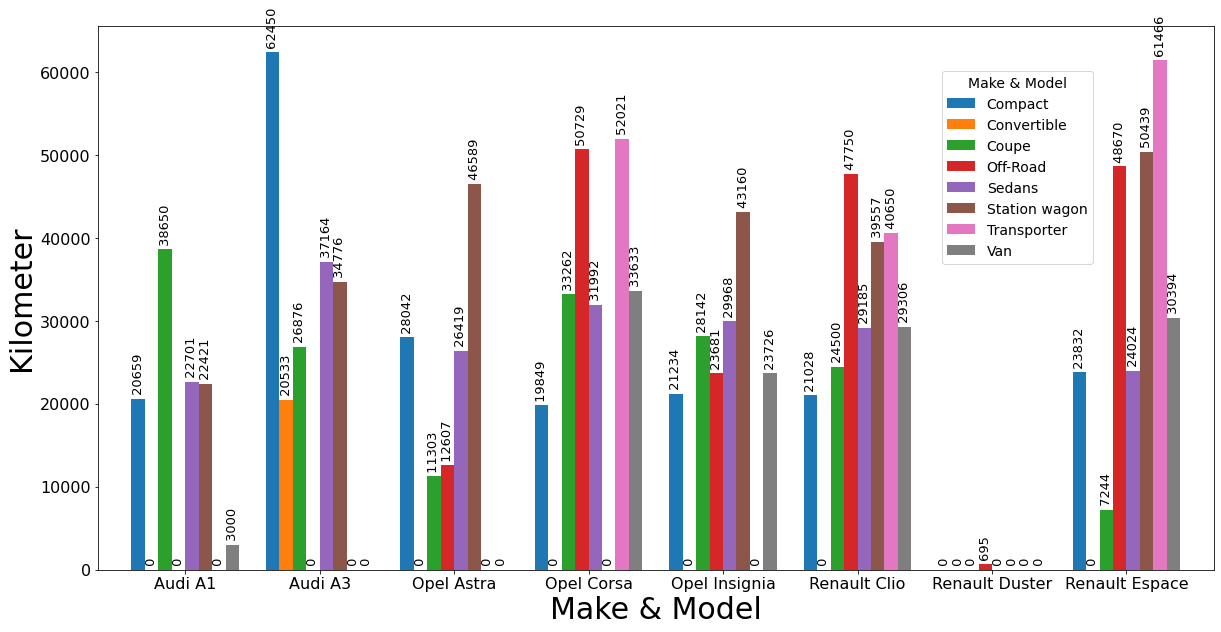

In [697]:
ax = avg_km.unstack(level=1).plot.bar(figsize=(20, 10), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=13, rotation=90,fmt=" %.f")
    
ax.set_xlabel('Make & Model', fontsize=30)
ax.set_ylabel('Kilometer', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=14, prop={'size': 14}, bbox_to_anchor=(0.75, 0.55));

## Average Consumption of the body types

In [698]:
avg_cons = df.groupby([ "body_type"])[["cons_comb"]].mean()
avg_cons

cons_comb
body_type               
Compact             5.01
Convertible         4.99
Coupe               4.74
Off-Road            5.03
Sedans              4.65
Station wagon       5.01
Transporter         4.36
Van                 5.39

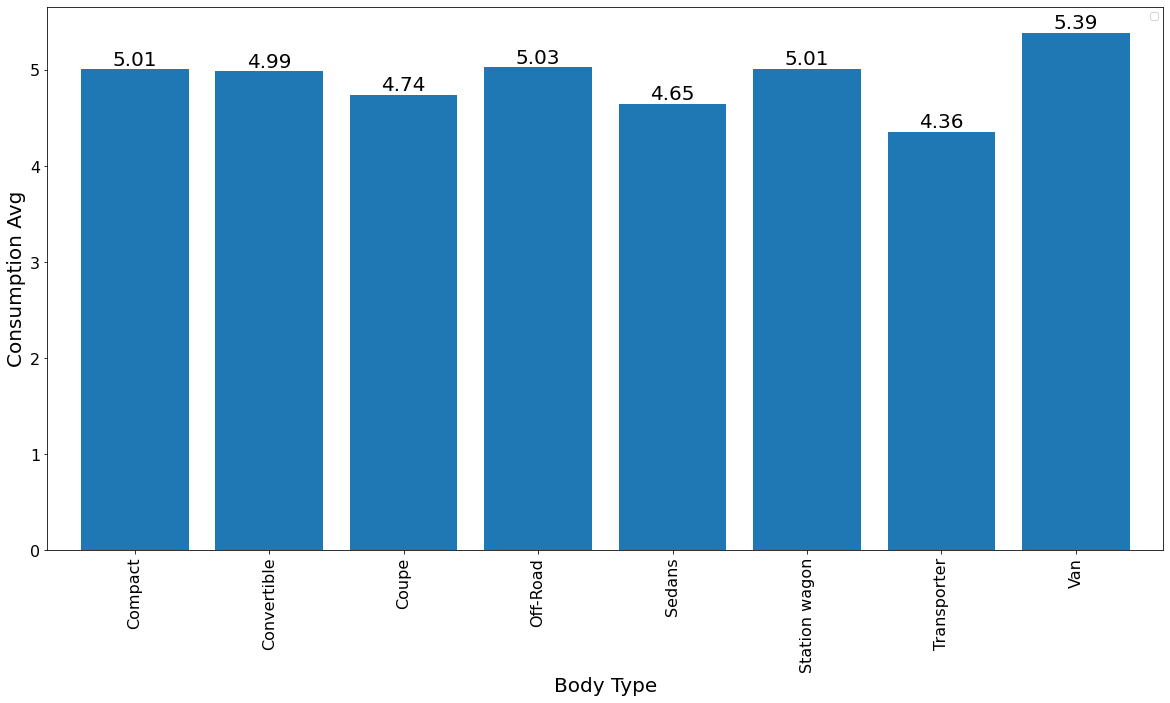

In [699]:
ax = avg_cons.plot.bar(figsize=(20, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0, fmt="%.2f")
    
ax.set_xlabel('Body Type', fontsize=20)
ax.set_ylabel('Consumption Avg', fontsize=20)
plt.legend([]);

## Average price of the vehicles according to the gear types they use

In [703]:
avg_price1 = df.groupby(["make_model", "gearing_type"]).price.mean()
avg_price1

make_model      gearing_type  
Audi A1         Automatic        21451.66
                Manual           16659.51
                Semi-automatic   20936.53
Audi A3         Automatic        21490.72
                Manual           19433.99
                Semi-automatic   27289.92
Opel Astra      Automatic        18843.30
                Manual           13513.80
                Semi-automatic   16132.72
Opel Corsa      Automatic        14051.36
                Manual            9021.49
                Semi-automatic   11930.00
Opel Insignia   Automatic        23117.27
                Manual           19753.97
Renault Clio    Automatic        16225.76
                Manual            9501.23
                Semi-automatic   16507.76
Renault Duster  Automatic        14641.50
                Manual           12795.92
Renault Espace  Automatic        30905.00
                Manual           23691.40
                Semi-automatic   25114.08
Name: price, dtype: float64

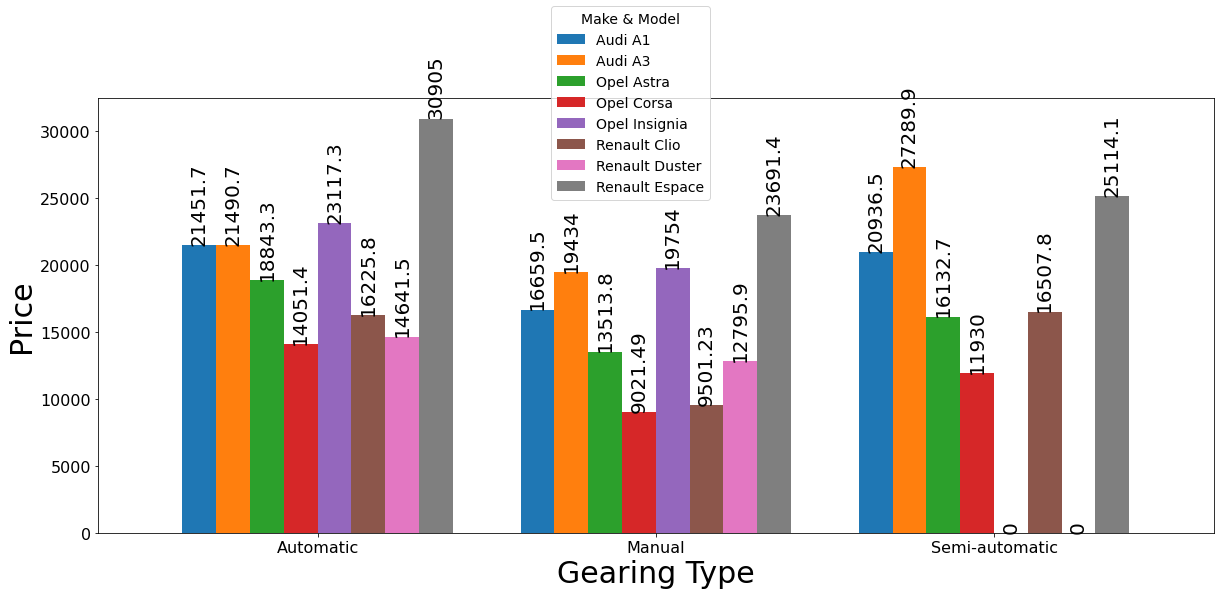

In [704]:
ax = avg_price1.unstack(level=0).plot.bar(figsize=(20, 8), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Gearing Type', fontsize=30)
ax.set_ylabel('Price', fontsize=30)
plt.legend(title="Make & Model", title_fontsize=14, prop={'size': 14}, bbox_to_anchor=(0.4, 0.75));